# ***Rossman Store***

# Importação das bibliotecas utilizadas

In [1]:
import pandas as pd #manipulação de dataframes
import numpy as np #recursos matemáticos
import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #visualização de dados
import datetime #recursos de data e hora
import math
import PIL

# Dataset - Vendas

In [2]:
vendas_df = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/projects/Rossman Store/dataset/brutos/train.csv') #info sobre as vendas

/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_64171/396645166.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  vendas_df = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/projects/Rossman Store/dataset/brutos/train.csv') #info sobre as vendas


In [3]:
vendas_df.shape # 9 colunas/atributos e 1 milhão+ linhas/registros de vendas

(1017209, 9)

Dicionário de Variáveis

- **Store**: Identificador da loja  
- **DayOfWeek**: Dia da semana (1 = segunda-feira, ..., 7 = domingo)  
- **Date**: Data da venda  
- **Sales**: Vendas/dia (quantidade de euros vendidos)  
- **Customers**: Número de clientes no dia  
- **Open**: Indica se a loja estava aberta (1 = aberta, 0 = fechada)  
- **Promo**: Indica se havia uma promoção no dia específico de venda  
- **StateHoliday**: Indica se o dia era um feriado estadual (`0`, `a`, `b`, `c`)  
- **SchoolHoliday**: Indica se havia feriado escolar (1 = sim, 0 = não)  

In [4]:
vendas_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
vendas_df['DayOfWeek'].unique() #Indo da segunda-feira (1) até o domingo (7)

array([5, 4, 3, 2, 1, 7, 6])

In [6]:
vendas_df['StateHoliday'].unique() # feriado (a = feriado público, b = Páscoa, c = Natal, 0 = nenhum).

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [7]:
vendas_df.info() #Não há dados faltantes/nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
vendas_df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

# Dataset - Lojas

In [9]:
store_df = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/projects/Rossman Store/dataset/brutos/store.csv') #info sobre as Lojas

Dicionário de Variáveis - `store_df`

- **Store**: Identificador da loja (mesmo do dataset de vendas)  
- **StoreType**: Tipo da loja (`a`, `b`, `c`, `d`)  
- **Assortment**: Tipo de sortimento (também relacionado ao tipo da loja):  
  - `a` = básico  
  - `b` = extra  
  - `c` = estendido  
- **CompetitionDistance**: Distância (em metros) até a loja concorrente mais próxima  
- **CompetitionOpenSinceMonth**: Mês de abertura da loja concorrente  
- **CompetitionOpenSinceYear**: Ano de abertura da loja concorrente  
- **Promo2**: Promoção contínua e consecutiva em algumas lojas  
  - `0` = não participa  
  - `1` = participa  
- **Promo2SinceMonth**: Mês em que a Promo2 começou  
- **Promo2SinceYear**: Ano em que a Promo2 começou  
- **PromoInterval**: Meses (intervalos consecutivos) em que a Promo2 é ativa  

In [10]:
store_df.shape # 10 colunas/atributos e mil+ linhas/lojas


(1115, 10)

In [11]:
vendas_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [12]:
store_df.info() #há valores nulos!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
store_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

# ***Exploração dos Dados***

# Dados das Vendas

<Axes: >

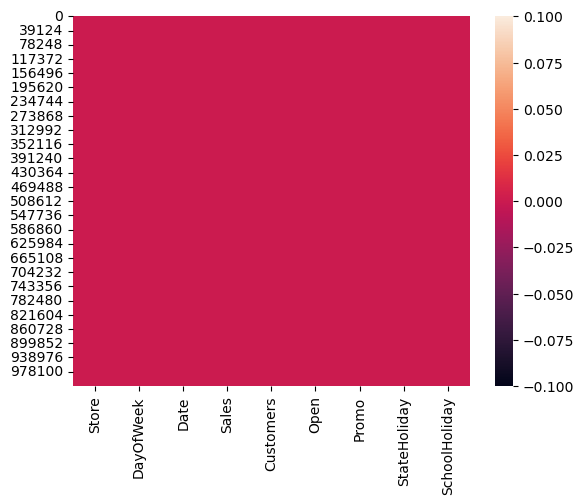

In [14]:
sns.heatmap(vendas_df.isnull()) #Indicando que não há dado faltante

In [15]:
vendas_df.isnull().sum() #Confirmando que não há dados faltantes no dataset de vendas. Logo não faremos nenhum pré-processamento aqui.

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

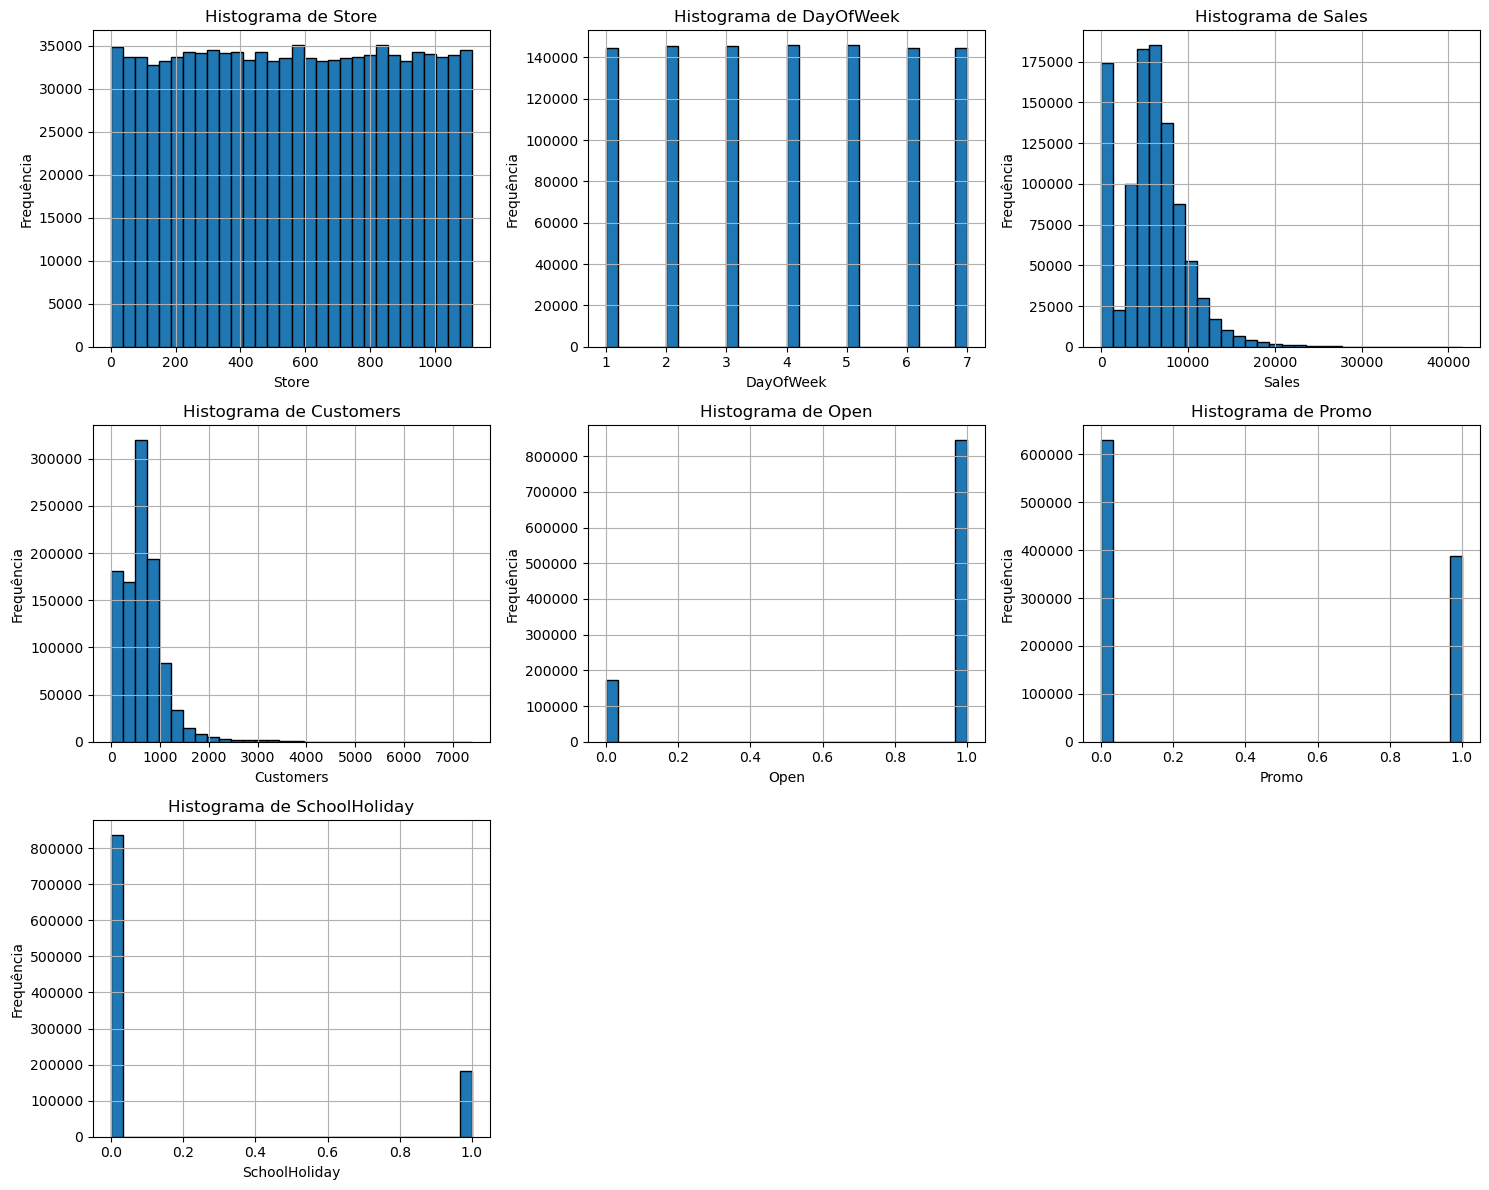

In [16]:
# Lista de colunas não numéricas a serem excluídas
colunas_nao_numericas = ['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'] # Serão removidas

# Criar uma cópia do dataframe sem as colunas não numéricas
vendas_df_numericas = vendas_df.drop(columns=colunas_nao_numericas, errors='ignore')

# Definir o número de colunas e linhas para a grade de subplots
n_cols = 3  # Número de colunas na grade (ajuste conforme necessário)
n_linhas = math.ceil(len(vendas_df_numericas.columns) / n_cols)  # Calcula o número de linhas necessário

# Criar a figura e a grade de subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(15, n_linhas * 4))

# Ajustar axes para ser iterável em todos os casos
if n_linhas > 1 or n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterar pelas colunas numéricas e plotar os histogramas
for i, column in enumerate(vendas_df_numericas.columns):
    vendas_df_numericas[column].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequência')

# Ocultar subplots vazios, se houver
for j in range(len(vendas_df_numericas.columns), len(axes)):
    fig.delaxes(axes[j])

# Otimizar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar a figura com todos os subplots
plt.show()

### Análise de cada histograma:

**Store:** Sugere que o conjunto de dados contém um número similar de registros (observações) para cada uma das lojas numeradas de 1 a 1115. Não há lojas com uma representação significativamente maior ou menor de dados em comparação com as outras.

**DayOfWeek:** A distribuição é relativamente uniforme entre os dias da semana. Cada dia da semana (de 1 a 7) possui uma frequência de ocorrência bastante similar, com aproximadamente 140.000 registros cada. Isso indica que os dados estão bem distribuídos ao longo dos dias da semana.

**Sales:** Exibe uma distribuição assimétrica positiva (à direita). A grande maioria das observações de vendas concentra-se em valores mais baixos, com uma cauda longa estendendo-se para valores de vendas mais altos. Há um pico significativo de vendas em torno de 0, o que pode indicar dias em que a loja estava fechada ou não houve vendas. A frequência diminui drasticamente à medida que o valor das vendas aumenta, indicando que vendas muito altas são raras.

**Customers:** Semelhante à distribuição de vendas, o número de clientes também apresenta uma distribuição assimétrica positiva. A maioria dos registros mostra um número menor de clientes, com a frequência diminuindo à medida que o número de clientes aumenta. Há também um pico próximo de zero clientes, o que pode estar correlacionado com os dias de vendas zero (loja fechada).

**Open:** Observa-se uma frequência muito maior para o valor 1 (loja aberta) em comparação com o valor 0 (loja fechada). Isso indica que a grande maioria dos registros no conjunto de dados corresponde a dias em que as lojas estavam abertas (Evidentemente).

**Promo:** Há uma frequência maior para o valor 0 (sem promoção) do que para o valor 1 (com promoção). Isso sugere que, no período coberto pelos dados, houve mais dias sem promoções do que com promoções, embora a diferença não seja tão drástica quanto na variável "Open". Aproximadamente, parece haver um pouco mais de 400.000 ocorrências de promoção e mais de 600.000 sem promoção.

**SchoolHoliday:** Mostra que a grande maioria dos registros corresponde a dias que não são feriados escolares (valor 0). A frequência de dias com feriado escolar (valor 1) é significativamente menor, em torno de 150.000, comparado a mais de 800.000 dias normais.

### Devemos considerar os dias em que as lojas estavam fechadas? Não. Portanto, aplicaremos um filtro no dataset de vendas para incluir apenas os dias em que as lojas estavam abertas.

In [17]:
closed_vendas_df = vendas_df[vendas_df['Open'] == 0]
open_vendas_df = vendas_df[vendas_df['Open'] == 1]

print('Total = ', len(vendas_df))
print('Número de lojas/dias fechado = ', len(closed_vendas_df))
print('Número de lojas/dias aberto = ', len(open_vendas_df))

# Calcular a proporção de dias/lojas fechados
proporcao_fechados = len(closed_vendas_df) / len(vendas_df)
print(f'Proporção de lojas/dias fechados: {proporcao_fechados:.4f}')

# Agrupar o dataframe de vendas fechadas pelo ID da loja e contar os registros
dias_fechados_por_loja = closed_vendas_df['Store'].value_counts().sort_index()

print("\nNúmero de dias fechados por loja:")
print(dias_fechados_por_loja)

# Calcular a média de dias fechados por loja
media_dias_fechados = dias_fechados_por_loja.mean()

print(f"\nMédia de dias fechados por loja: {media_dias_fechados:.2f}")

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392
Proporção de lojas/dias fechados: 0.1699

Número de dias fechados por loja:
Store
1       161
2       158
3       163
4       158
5       163
       ... 
1111    163
1112    163
1113    158
1114    158
1115    161
Name: count, Length: 1105, dtype: int64

Média de dias fechados por loja: 156.40


Veja que em média, cada loja ficou fechada por 156 dias durante o período de 2013-01-01 a 2015-07-31.

Diante do exposto, serão considerados 844.382 registros de vendas, correspondentes apenas aos dias em que as lojas estavam em funcionamento.

In [18]:
vendas_df = vendas_df[vendas_df['Open'] == 1]
vendas_df.shape

(844392, 9)

Filtramos o dataset vendas_df para manter **apenas os registros em que as lojas estavam abertas**. Como, após esse filtro, o atributo Open possui valor 1 em todas as linhas, faz sentido removê-lo do conjunto de dados, pois ele deixou de trazer informações relevantes.

In [19]:
vendas_df.drop(['Open'], axis = 1, inplace=True)

In [20]:
vendas_df.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      2          5  2015-07-31   6064        625      1            0   
2      3          5  2015-07-31   8314        821      1            0   
3      4          5  2015-07-31  13995       1498      1            0   
4      5          5  2015-07-31   4822        559      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [21]:
vendas_df.describe()

Store      DayOfWeek          Sales      Customers  \
count  844392.000000  844392.000000  844392.000000  844392.000000   
mean      558.422920       3.520361    6955.514291     762.728395   
std       321.731914       1.723689    3104.214680     401.227674   
min         1.000000       1.000000       0.000000       0.000000   
25%       280.000000       2.000000    4859.000000     519.000000   
50%       558.000000       3.000000    6369.000000     676.000000   
75%       837.000000       5.000000    8360.000000     893.000000   
max      1115.000000       7.000000   41551.000000    7388.000000   

               Promo  SchoolHoliday  
count  844392.000000  844392.000000  
mean        0.446352       0.193580  
std         0.497114       0.395103  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000

## Estatísticas Descritivas: `vendas_df` Antes e Depois do Pré-processamento

Analisar as saídas do método `.describe()` para o dataset de vendas (`vendas_df`) antes e depois da etapa de pré-processamento (que incluiu a filtragem para manter apenas os dias em que as lojas estavam abertas e a remoção da coluna 'Open') nos permite entender o impacto dessa limpeza nos dados.

---

### 1. Contagem de Registros (`count`)

* **Antes do Pré-processamento:** Todas as colunas apresentavam 1.017.209 registros.
* **Depois do Pré-processamento:** Todas as colunas passaram a ter 844.392 registros.

>A redução de 172.817 registros reflete a remoção das entradas onde as lojas estavam fechadas (`Open == 0`). Isso confirma que o filtro foi aplicado corretamente.

---

### 2. Coluna `Store` (Identificador da Loja)

* **Estatísticas Principais (Média, Desvio Padrão, Mín, Quartis, Máx):**
    * **Antes:** Média ≈ 558.43, std ≈ 321.91, min 1, max 1115.
    * **Depois:** Média ≈ 558.42, std ≈ 321.73, min 1, max 1115.

>As estatísticas da coluna `Store` mantiveram-se praticamente estáveis, alterando-se apenas a contagem total. Isso é esperado, pois filtrar por lojas abertas não deve modificar a distribuição intrínseca dos identificadores das lojas.

---

### 3. Coluna `DayOfWeek` (Dia da Semana)

* **Média (`mean`):**
    * Antes: ≈ 3.998
    * Depois: ≈ 3.520
* **Desvio Padrão (`std`):**
    * Antes: ≈ 1.997
    * Depois: ≈ 1.724
* **Mediana (`50%`):**
    * Antes: 4.0
    * Depois: 3.0
* **75º Percentil (`75%`):**
    * Antes: 6.0
    * Depois: 5.0

> Observou-se uma diminuição na média e na mediana de `DayOfWeek`. Isso indica que dias com valores mais altos (como 6 para sábado e 7 para domingo) foram proporcionalmente mais removidos, o que é consistente com o fechamento de lojas aos domingos ou em outros dias específicos. A redução no desvio padrão aponta para uma menor variabilidade nos dias da semana em que as lojas estão operacionais.

---

### 4. Coluna `Sales` (Vendas)

* **Média (`mean`):**
    * Antes: ≈ 5773.82
    * Depois: ≈ 6955.51
* **Desvio Padrão (`std`):**
    * Antes: ≈ 3849.93
    * Depois: ≈ 3104.21
* **Mínimo (`min`):**
    * Antes: 0.0
    * Depois: 0.0
* **Quartis (25%, 50%, 75%):**
    * Todos os quartis aumentaram. A mediana (`50%`) passou de ≈ 5744 para ≈ 6369.

>Houve um aumento expressivo na média de vendas, resultado da remoção dos dias com vendas zero (lojas fechadas). O desvio padrão diminuiu com a exclusão desses valores zero. É importante notar que o valor mínimo de vendas permaneceu 0, mesmo para lojas abertas, sugerindo dias sem vendas registradas apesar da loja estar operacional. **Este é um ponto para investigação futura.**

---

### 5. Coluna `Customers` (Número de Clientes)

* **Média (`mean`):**
    * Antes: ≈ 633.15
    * Depois: ≈ 762.73
* **Desvio Padrão (`std`):**
    * Antes: ≈ 464.41
    * Depois: ≈ 401.23
* **Mínimo (`min`):**
    * Antes: 0.0
    * Depois: 0.0
* **Quartis (25%, 50%, 75%):**
    * Todos os quartis aumentaram. A mediana (`50%`) passou de ≈ 609 para ≈ 676.

>Assim como em `Sales`, a média de clientes subiu e o desvio padrão caiu após a remoção dos dias de loja fechada. O valor mínimo de clientes também se manteve em 0, indicando dias com lojas abertas mas sem clientes registrados, **o que também merece atenção.**

---

### 6. Coluna `Open` (Loja Aberta/Fechada)

* **Antes do Pré-processamento:**
    * Média: ≈ 0.83 (indicando que ~83% dos registros eram de lojas abertas).
    * Mínimo: 0, Máximo: 1.
    * Quartis (25%, 50%, 75%): Todos 1.
* **Depois do Pré-processamento:**
    * A coluna foi removida, pois, após o filtro, todos os seus valores seriam 1.

> A média anterior de ≈0.83 é consistente com a proporção de dias abertos (844.392) em relação ao total (1.017.209), que é de aproximadamente 83,01%.

---

### 7. Coluna `Promo` (Indica se havia promoção)

* **Média (`mean` - proporção de dias com promoção):**
    * Antes: ≈ 0.382 (ou ~0.393 pela análise de histograma).
    * Depois: ≈ 0.446.

> A proporção de dias com promoção (`mean` da variável binária) aumentou após a filtragem. Isso sugere que as promoções ocorrem com maior frequência em dias em que as lojas estão efetivamente abertas, ou que os dias de fechamento raramente coincidem com dias de promoção.

---

### 8. Coluna `SchoolHoliday` (Indica se havia feriado escolar)

* **Média (`mean` - proporção de dias com feriado escolar):**
    * Antes: ≈ 0.173 (ou ~0.147 pela análise de histograma).
    * Depois: ≈ 0.190.

> Observou-se um leve aumento na proporção de feriados escolares entre os dias de lojas abertas. Isso pode indicar uma tendência das lojas permanecerem abertas durante feriados escolares ou que os dias de fechamento não coincidem fortemente com esses feriados. A 75ª percentil permaneceu 0 em ambos os cenários, mostrando que menos de 25% dos dias (totais ou apenas de lojas abertas) são feriados escolares.

---

### Resumo das Diferenças

O pré-processamento ao remover os dias de lojas fechadas resultou em:
* Uma visão mais precisa e realista das médias de `Sales` e `Customers` nos dias de operação.
* Redução da variabilidade nos dados de `Sales` e `Customers` que era causada pelos valores zero dos dias de fechamento.
* Indicação de que os fechamentos de lojas não se distribuem uniformemente pela semana.
* Maior prevalência de promoções (`Promo`) quando se consideram apenas os dias em que as lojas estão funcionando.
* **Um ponto crítico para análise futura: a ocorrência de vendas e clientes nulos mesmo em dias em que as lojas estão registradas como abertas.**


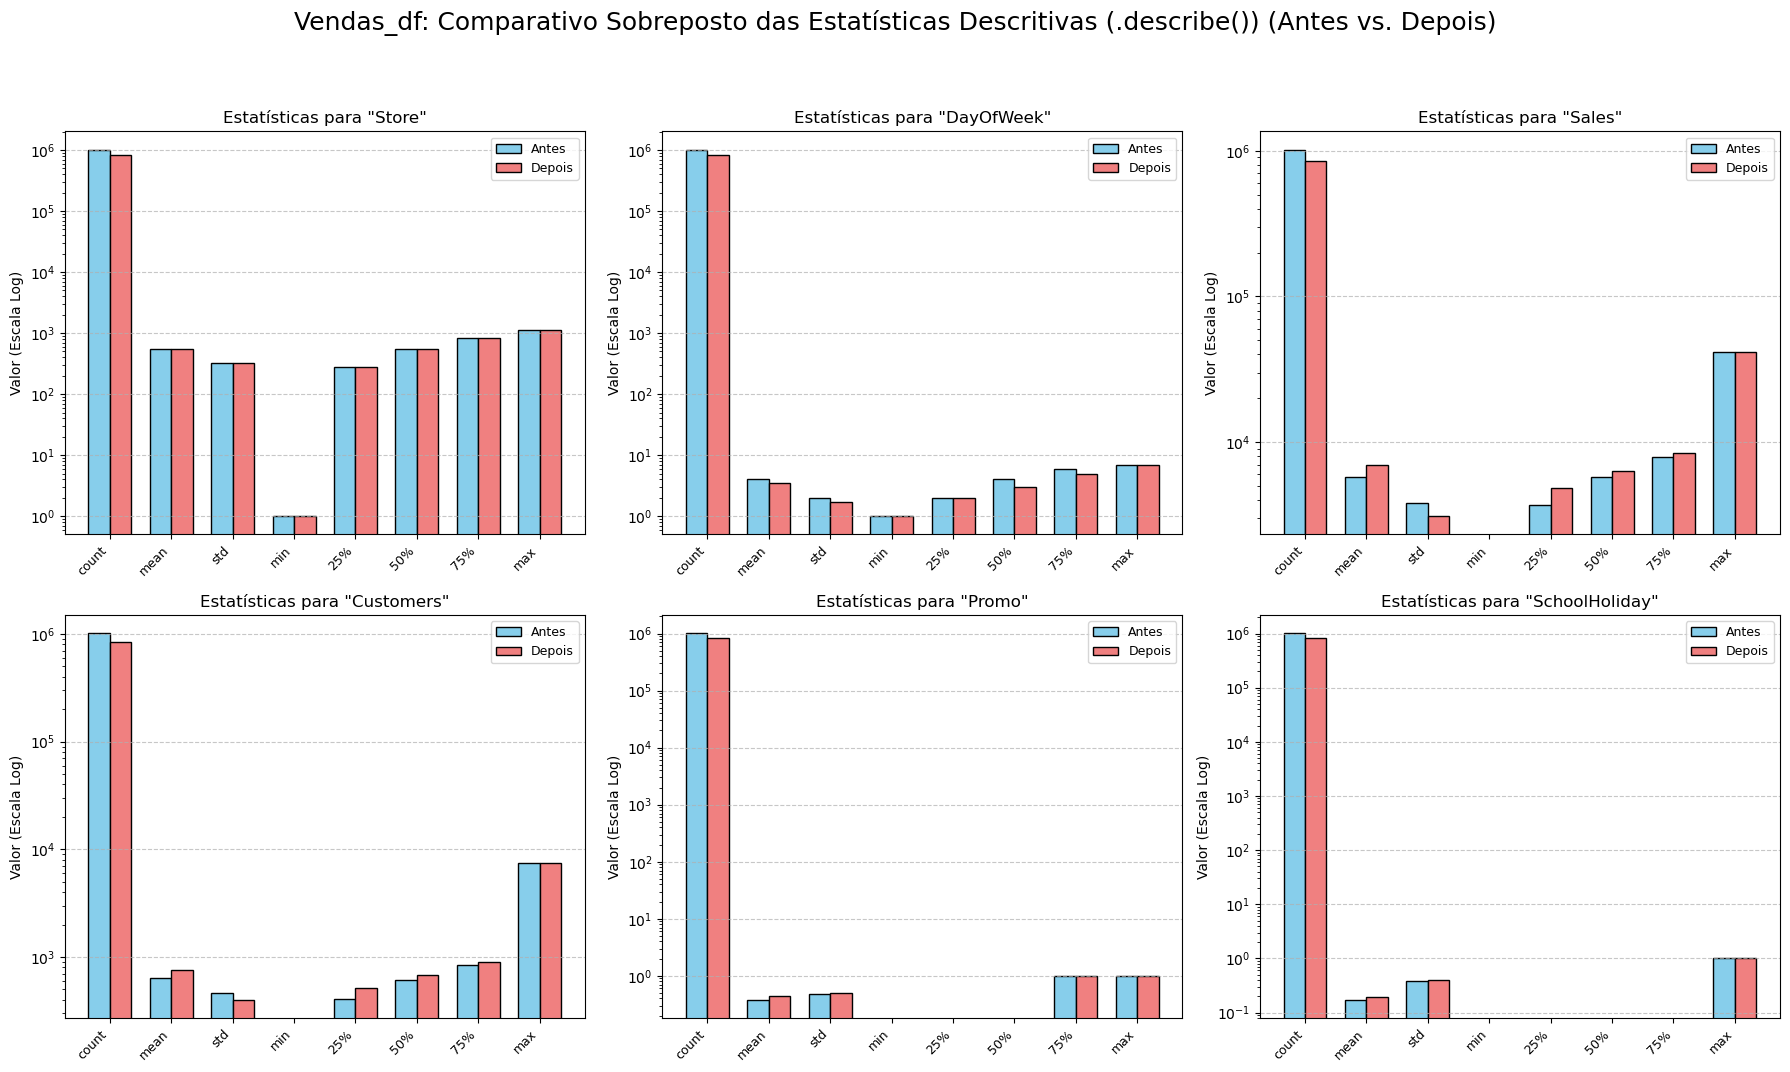

In [22]:
# Dados do describe() ANTES e DEPOIS do pré-processamento
data_before_dict = {
    'Store': {'count': 1017209, 'mean': 558.4297, 'std': 321.9087, 'min': 1, '25%': 280, '50%': 558, '75%': 838, 'max': 1115},
    'DayOfWeek': {'count': 1017209, 'mean': 3.998341, 'std': 1.997391, 'min': 1, '25%': 2, '50%': 4, '75%': 6, 'max': 7},
    'Sales': {'count': 1017209, 'mean': 5773.819, 'std': 3849.926, 'min': 0, '25%': 3727, '50%': 5744, '75%': 7856, 'max': 41551},
    'Customers': {'count': 1017209, 'mean': 633.1459, 'std': 464.4117, 'min': 0, '25%': 405, '50%': 609, '75%': 837, 'max': 7388},
    'Promo': {'count': 1017209, 'mean': 0.381515, 'std': 0.485759, 'min': 0, '25%': 0, '50%': 0, '75%': 1, 'max': 1},
    'SchoolHoliday': {'count': 1017209, 'mean': 0.172931, 'std': 0.378197, 'min': 0, '25%': 0, '50%': 0, '75%': 0, 'max': 1}
}

data_after_dict = {
    'Store': {'count': 844392, 'mean': 558.422920, 'std': 321.731914, 'min': 1, '25%': 280, '50%': 558, '75%': 837, 'max': 1115},
    'DayOfWeek': {'count': 844392, 'mean': 3.520361, 'std': 1.723689, 'min': 1, '25%': 2, '50%': 3, '75%': 5, 'max': 7},
    'Sales': {'count': 844392, 'mean': 6955.514291, 'std': 3104.214680, 'min': 0, '25%': 4859, '50%': 6369, '75%': 8360, 'max': 41551},
    'Customers': {'count': 844392, 'mean': 762.728395, 'std': 401.227674, 'min': 0, '25%': 519, '50%': 676, '75%': 893, 'max': 7388},
    'Promo': {'count': 844392, 'mean': 0.446352, 'std': 0.497114, 'min': 0, '25%': 0, '50%': 0, '75%': 1, 'max': 1},
    'SchoolHoliday': {'count': 844392, 'mean': 0.190162, 'std': 0.392429, 'min': 0, '25%': 0, '50%': 0, '75%': 0, 'max': 1}
}

# Criar DataFrames
desc_before_df = pd.DataFrame(data_before_dict)
desc_after_df = pd.DataFrame(data_after_dict)

# Configuração do plot
columns = desc_before_df.columns.tolist()
stats = desc_before_df.index.tolist()
ncols = 3
nrows = int(np.ceil(len(columns) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5.5))
axes = axes.flatten()

# Configuração das barras
bar_width = 0.35
x_pos = np.arange(len(stats))

# Plotar cada coluna
for i, col in enumerate(columns):
    ax = axes[i]

    # Obter valores antes e depois
    val_before = desc_before_df[col]
    val_after = desc_after_df.get(col, pd.Series(np.nan, index=stats))

    # Plotar barras
    ax.bar(x_pos - bar_width/2, val_before, bar_width, label='Antes', color='skyblue', edgecolor='black')
    ax.bar(x_pos + bar_width/2, val_after, bar_width, label='Depois', color='lightcoral', edgecolor='black')

    # Configurar rótulos e aparência
    ax.set_title(f'Estatísticas para "{col}"', fontsize=12)
    ax.set_ylabel('Valor', fontsize=10)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(stats, rotation=45, ha="right", fontsize=9)
    ax.legend(fontsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Verificar necessidade de escala logarítmica
    combined = pd.concat([val_before, val_after]).dropna()
    if not combined.empty:
        non_count = combined.drop('count', errors='ignore').abs()
        max_non_count = np.nan_to_num(non_count.max())

        has_count = 'count' in combined.index
        count_val = 0.0
        if has_count:
            counts = combined.loc['count']
            count_val = np.nan_to_num(counts.max() if isinstance(counts, pd.Series) else counts)

        min_val = np.nan_to_num(combined.abs().min())

        # Decidir sobre escala logarítmica
        use_log = (has_count and (max_non_count == 0 and count_val > 0 or
                                 max_non_count > 0 and count_val > max_non_count * 10)) or \
                  (max_non_count > 1000 and min_val >= 0)

        if use_log:
            ax.set_yscale('log')
            ax.set_ylabel('Valor (Escala Log)', fontsize=10)

# Remover eixos não utilizados
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Configurar título e layout
fig.suptitle('Vendas_df: Comparativo Sobreposto das Estatísticas Descritivas (.describe()) (Antes vs. Depois)', fontsize=18, y=1.0)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])

## Análise do Gráfico Comparativo das Estatísticas de `vendas_df` (Antes vs. Depois do Pré-processamento)


---

### 1. Estatísticas para `"Store"`
* **`count`**: Observa-se uma redução significativa na contagem de "Antes" (aprox. 1.017.20) para "Depois" (aprox. 844.392).
    * **Implicação**: Esta diminuição corresponde à remoção dos 172.817 dias de vendas em que as lojas estavam fechadas.
* **`mean`, `std`, `min`, `25%`, `50%`, `75%`, `max`**: Os valores para estas estatísticas permanecem praticamente idênticos entre "Antes" e "Depois".
    * **Implicação**: A filtragem não alterou a distribuição dos IDs das lojas em si, apenas o número de registros de vendas diárias associados a elas.

---

### 2. Estatísticas para `"DayOfWeek"`
* **`count`**: Reduziu de "Antes" para "Depois", como esperado.
* **`mean`**: Diminuiu de aproximadamente 4.0 (Antes) para cerca de 3.5 (Depois).
* **`std`**: Apresentou uma leve redução, de ~2.0 (Antes) para ~1.7 (Depois).
* **`50%` (Mediana)**: Caiu de 4 (Antes) para 3 (Depois).
* **`75%`**: Diminuiu de 6 (Antes) para 5 (Depois).
* **`min` e `max`**: Mantiveram-se em 1 e 7, respectivamente.
    * **Implicação**: A redução na média, mediana e 75º percentil sugere que dias com valores mais altos de `DayOfWeek` (como o domingo, dia 7, quando muitas lojas fecham) foram desproporcionalmente removidos. O dataset filtrado ("Depois") tem, portanto, uma concentração maior nos primeiros dias da semana.

---

### 3. Estatísticas para `"Sales"`
* **`count`**: Reduziu.
* **`mean`**: Aumentou de forma expressiva, de ~5774 (Antes) para ~6956 (Depois).
* **`std`**: Diminuiu de ~3850 (Antes) para ~3104 (Depois).
* **`min`**: Permaneceu `0` em ambos os cenários ("Antes" e "Depois").
* **`25%`, `50%` (Mediana), `75%`**: Todos estes quartis tiveram um aumento considerável.
    * **Implicação**: A remoção dos dias com `Sales == 0` (lojas fechadas) elevou significativamente a média de vendas e os valores centrais da distribuição nos dias operacionais. A variância diminuiu com a remoção desses zeros. O fato de o `min` continuar `0` após o filtro é um ponto crucial, indicando que mesmo lojas abertas podem ter vendas nulas, como você já observou para investigação futura.

---

### 4. Estatísticas para `"Customers"`
* **`count`**: Reduziu.
* **`mean`**: Aumentou substancialmente, de ~633 (Antes) para ~763 (Depois).
* **`std`**: Diminuiu de ~464 (Antes) para ~401 (Depois).
* **`min`**: Permaneceu `0` em ambos os casos.
* **`25%`, `50%` (Mediana), `75%`**: Todos estes quartis aumentaram.
    * **Implicação**: De forma similar a `Sales`, a exclusão dos dias de loja fechada (com `Customers == 0`) aumentou a média de clientes e os valores centrais. A variabilidade dos dados também foi reduzida. O `min` permanecendo `0` sugere que lojas abertas podem, ocasionalmente, não registrar clientes.

---

### 5. Estatísticas para `"Open"`
* **`count` (Antes)**: Mostra a contagem original total (1.017.209).
* **Barras "Depois"**: Para todas as estatísticas, as barras "Depois" estão zeradas ou ausentes no gráfico.
* **`mean` (Antes)**: Era aproximadamente 0.83, indicando que cerca de 83% dos registros originais correspondiam a dias de lojas abertas.
* **Outras estatísticas (Antes)**: Refletiam a natureza binária (0 ou 1) da coluna.
    * **Implicação**: A coluna `Open` foi removida do dataset após a filtragem, pois todos os registros restantes teriam `Open == 1`. Consequentemente, não há estatísticas "Depois" para esta coluna, o que é corretamente visualizado no gráfico.

---

### 6. Estatísticas para `"Promo"`
* **`count`**: Reduziu.
* **`mean`**: Aumentou de ~0.382 (Antes) para ~0.446 (Depois).
* **`std`**: Apresentou uma pequena alteração, esperada para variáveis binárias quando a proporção de ocorrências muda.
* **Mediana (`50%`)**: Permaneceu `0`, indicando que menos da metade dos dias (mesmo considerando apenas os dias abertos) tiveram promoção.
    * **Implicação**: A proporção de dias com promoção (`mean`) é maior no conjunto de dados "Depois" (lojas abertas). Isso indica que as promoções eram mais frequentes ou mais prováveis de ocorrer em dias em que as lojas estavam efetivamente operando.

---

### 7. Estatísticas para `"SchoolHoliday"`
* **`count`**: Reduziu.
* **`mean`**: Teve um leve aumento, de ~0.173 (Antes) para ~0.190 (Depois) (os valores exatos podem variar ligeiramente dependendo da fonte exata dos números no describe do PDF, mas a tendência é um leve aumento).
* **`std`**: Alterou-se minimamente.
* **75º Percentil**: Permaneceu `0` em ambos os cenários.
    * **Implicação**: Menos de 25% dos dias eram feriados escolares, tanto no dataset original quanto no filtrado. O leve aumento na média após o filtro sugere que os dias de fechamento não coincidiam fortemente com os feriados escolares ou que as lojas tendiam a permanecer abertas durante esses feriados.

---

# Dados das Lojas

<Axes: >

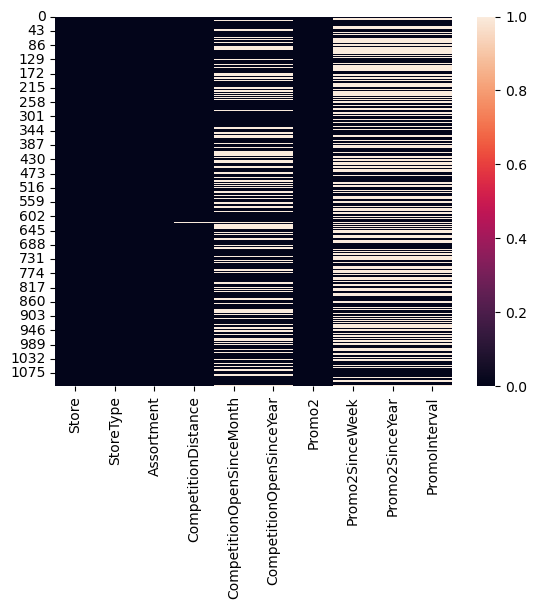

In [23]:
sns.heatmap(store_df.isnull()) #Indicando que há dados faltantes

In [24]:
store_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [25]:
store_df[store_df['CompetitionDistance'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

In [26]:
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [27]:
store_df.tail()

Store StoreType Assortment  CompetitionDistance  \
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

In [28]:
store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

In [29]:
store_df[store_df['CompetitionOpenSinceYear'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

Observe que os índices dos meses com dados faltantes coincidem com os índices dos anos também ausentes. Portanto, se o mês não foi registrado, o respectivo ano também não foi.

In [30]:
store_df[store_df['Promo2'] == 0]

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
5         6         a          a                310.0   
6         7         a          c              24000.0   
...     ...       ...        ...                  ...   
1107   1108         a          a                540.0   
1109   1110         c          c                900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
5                          12.0                    2013.0       0   
6                           4.0                    2013.0       0   
...                         ...                       ...     ...   
1107                        4.0                    2004.0       0   
1109                        9.0                    2010.0       0   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   

      Promo2SinceWeek  Promo2SinceYear PromoInterval  
0                 NaN              NaN           NaN  
3                 NaN              NaN           NaN  
4                 NaN              NaN           NaN  
5                 NaN              NaN           NaN  
6                 NaN              NaN           NaN  
...               ...              ...           ...  
1107              NaN              NaN           NaN  
1109              NaN              NaN           NaN  
1111              NaN              NaN           NaN  
1112              NaN              NaN           NaN  
1113              NaN              NaN           NaN  

[544 rows x 10 columns]

In [31]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_df[str].fillna(0, inplace=True) #Substituindo todos os valores NaN (string) dos atributos por 0.

/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_64171/480561461.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df[str].fillna(0, inplace=True) #Substituindo todos os valores NaN (string) dos atributos por 0.


<Axes: >

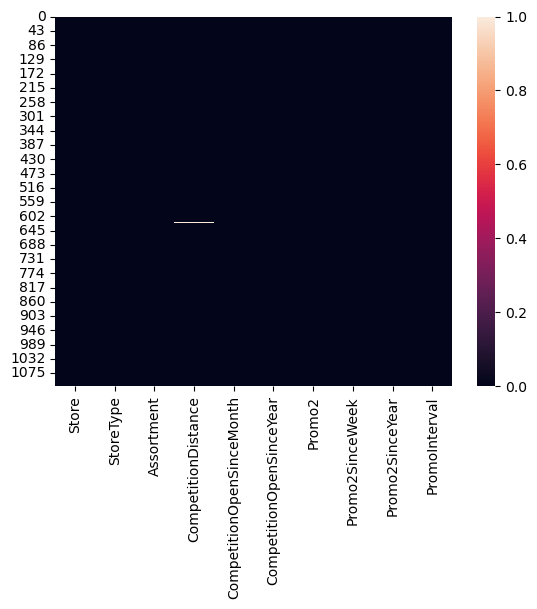

In [32]:
sns.heatmap(store_df.isnull())

In [33]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_64171/170787372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)


<Axes: >

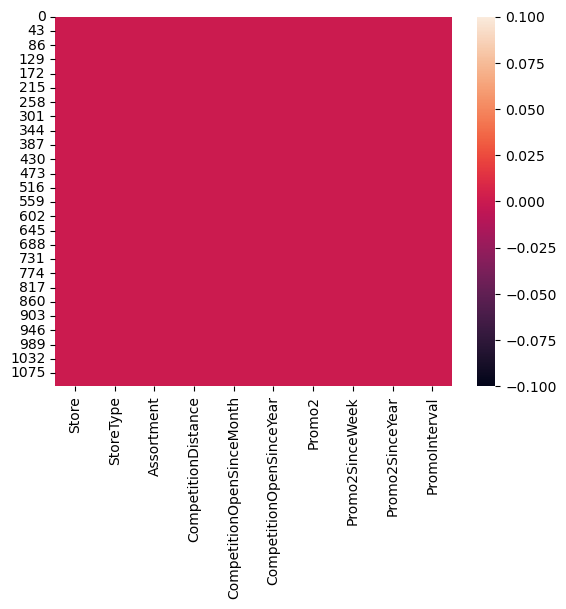

In [34]:
sns.heatmap(store_df.isnull())

In [35]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## Justificativa para o Tratamento de Dados Faltantes em `store_df`

---

### 1. Variáveis Categóricas e de Data Relacionadas a Promoções e Competição

Para as seguintes colunas, os valores NaN foram substituídos por `0`:
* `Promo2SinceWeek`
* `Promo2SinceYear`
* `PromoInterval`
* `CompetitionOpenSinceMonth`
* `CompetitionOpenSinceYear`

**Justificativa:**

* **`Promo2SinceWeek`, `Promo2SinceYear`, e `PromoInterval`**:
    * Estas colunas estão diretamente relacionadas à variável `Promo2`, que indica se uma loja participa de uma promoção contínua.
    * Observou-se que o número de valores ausentes (NaNs) nessas três colunas (544 ocorrências) correspondia exatamente ao número de lojas onde `Promo2` é igual a `0` (ou seja, a loja não participa da promoção).
    * Neste contexto, o valor `0` foi utilizado para significar **"não aplicável"** ou **"promoção não existente"** para aquela loja. Se uma loja não tem `Promo2`, as datas de início ou os intervalos dessa promoção são, de fato, irrelevantes. Esta é uma forma comum de lidar com dados faltantes que são condicionais a outra variável.
    * Para `PromoInterval`, que é uma coluna do tipo objeto (string), a substituição por `0` numérico foi uma decisão inicial. **Recomendação futura**: para manter a consistência do tipo de dado, poderia ser mais adequado substituir por uma string como `"Nenhum"` ou tratar o `0` como uma categoria específica durante a engenharia de features.

* **`CompetitionOpenSinceMonth` e `CompetitionOpenSinceYear`**:
    * Estas colunas indicam o mês e o ano de abertura do competidor mais próximo. Foram identificados 354 valores ausentes para ambas, e estes NaNs coincidem.
    * A substituição por `0` nestes casos é uma forma de **sinalizar a ausência de dados específicos sobre a data de abertura do competidor** ou, potencialmente, a ausência de um competidor próximo (especialmente para os 3 casos onde `CompetitionDistance` também era NaN).
    * **Importante**: O valor `0` não representa um mês ou ano válido. Portanto, ao utilizar estas colunas para cálculos (como a idade do competidor), este valor `0` deverá ser tratado como um **caso especial** ou um **flag** indicando "data desconhecida" ou "sem competidor". Esta abordagem permite manter os registros no dataset, mas requer atenção em etapas subsequentes para evitar interpretações errôneas (ex: um ano 0 resultando em uma idade de competição extremamente grande e sem sentido).

---

### 2. `CompetitionDistance`

Para a coluna `CompetitionDistance`, que representa a distância em metros para o competidor mais próximo e possuía 3 valores ausentes, optou-se por preencher os NaNs com a **média** da coluna.

`store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)`

**Justificativa:**

* **Pequena Quantidade de NaNs:** Com apenas 3 valores ausentes em um total de 1115 lojas, o impacto da imputação no comportamento geral da variável é mínimo.
* **Manutenção da Estrutura do Dado:** A imputação pela média permite que os registros sejam mantidos para análise sem introduzir um viés significativo, assumindo que as lojas com dados faltantes têm uma distância de competição que, em média, não destoa radicalmente das demais.
* **Simplicidade e Praticidade:** É uma técnica de imputação direta e fácil de implementar, sendo uma escolha comum para preencher poucos valores numéricos faltantes.
* **Consideração (Mediana vs. Média):** Embora a média seja sensível a outliers, com apenas 3 valores sendo imputados, a diferença entre usar a média ou a mediana (que é mais robusta a outliers) provavelmente seria desprezível. A escolha pela média é aceitável neste cenário. A intenção é preencher o valor com um dado central da distribuição existente.

---


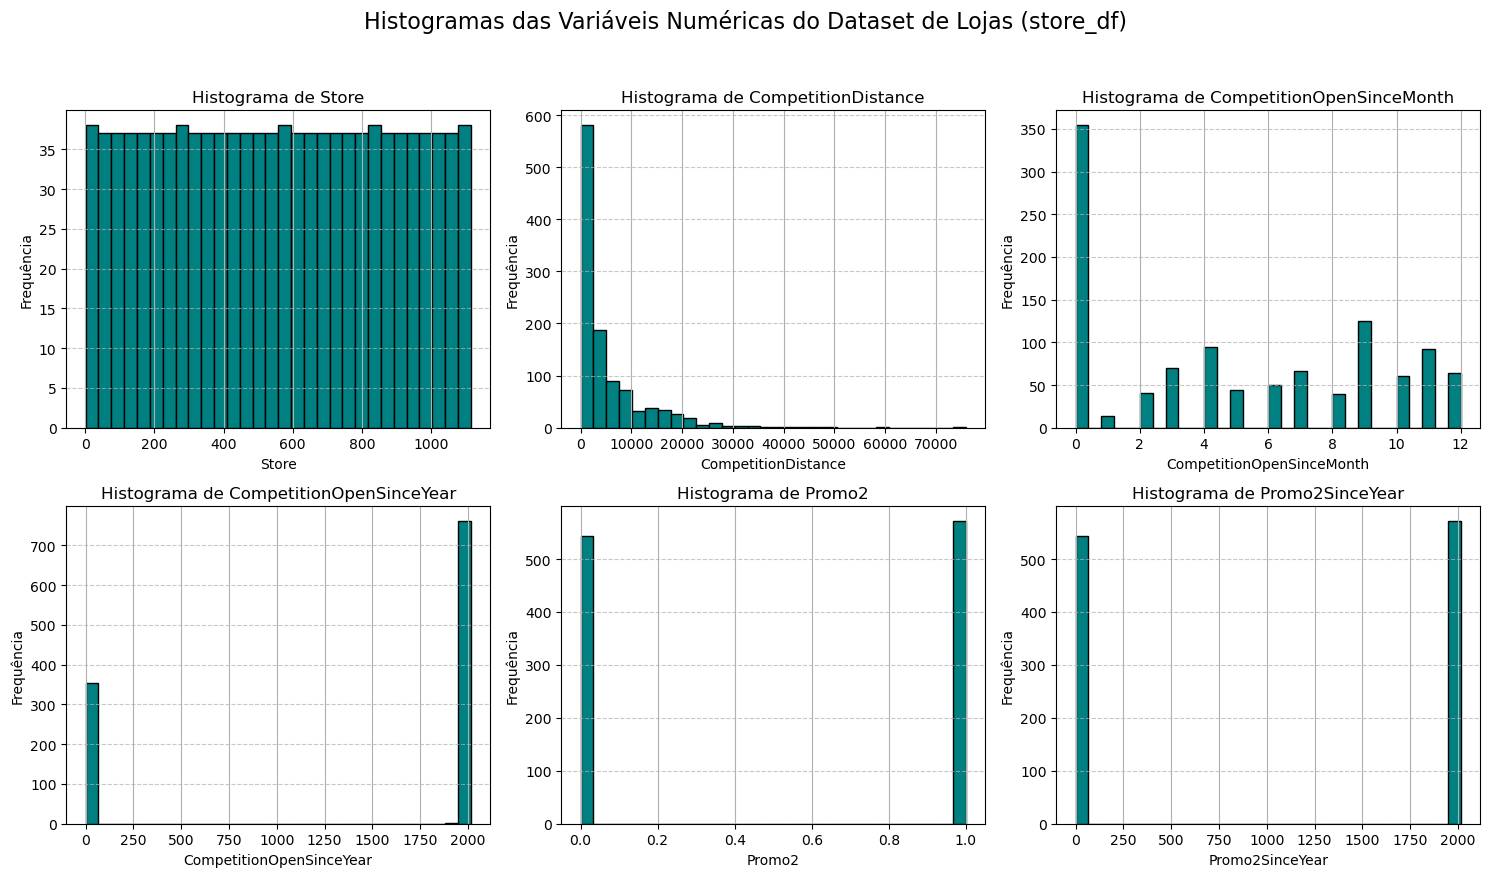

In [36]:
numerical_cols_store_df = [
    'Store',
    'CompetitionDistance',
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2',
    'Promo2SinceYear'
]

# Criar uma cópia do dataframe apenas com as colunas selecionadas para histograma
# (Para garantir que não estamos modificando o store_df original dentro desta lógica de plotagem)
store_df_for_hist = store_df[numerical_cols_store_df].copy()

# 2. Definir o número de colunas e linhas para a grade de subplots
n_cols_grid = 3  # Número de colunas na grade (mesmo estilo do vendas_df)
n_rows_grid = math.ceil(len(store_df_for_hist.columns) / n_cols_grid)

# 3. Criar a figura e a grade de subplots
fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(15, n_rows_grid * 4.5)) # Ajuste de altura similar

# Ajustar axes para ser iterável em todos os casos (se for uma única linha/coluna)
if n_rows_grid == 1 and n_cols_grid == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# 4. Iterar pelas colunas numéricas e plotar os histogramas
for i, column_name in enumerate(store_df_for_hist.columns):
    ax = axes[i]
    store_df_for_hist[column_name].hist(ax=ax, bins=30, edgecolor='black', color='teal') # Cor pode ser ajustada
    ax.set_title(f'Histograma de {column_name}', fontsize=12)
    ax.set_xlabel(column_name, fontsize=10)
    ax.set_ylabel('Frequência', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Ocultar subplots vazios, se houver
for j in range(len(store_df_for_hist.columns), len(axes)):
    fig.delaxes(axes[j])

# 6. Otimizar o layout para evitar sobreposição e adicionar título geral
fig.suptitle('Histogramas das Variáveis Numéricas do Dataset de Lojas (store_df)', fontsize=16, y=1.0)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajustar para o suptitle

plt.show()


## Análise de cada histograma:

### Análise dos Histogramas do Dataset de Lojas (`store_df`)

---

## 1. `Store`
O dataset `store_df` possui uma entrada única para cada loja. A uniformidade neste histograma, que agrupa os IDs das lojas em `bins` (intervalos), indica que os IDs estão distribuídos de forma relativamente contínua e que cada `bin` de IDs contém um número similar de lojas. Isso confirma a presença de dados para a totalidade das lojas ou para faixas de IDs de forma equilibrada.

---

## 2. `CompetitionDistance`
A distribuição para `CompetitionDistance` é **acentuadamente assimétrica à direita**. Observa-se uma alta concentração de valores (frequência) para distâncias menores, com uma cauda longa que se estende para distâncias maiores.
Isso sugere que a maioria das lojas tem competidores localizados relativamente próximos. Lojas com competidores muito distantes são menos comuns. O preenchimento dos 3 valores NaN pela média provavelmente teve um impacto visual desprezível na forma geral desta distribuição.

---

## 3. `CompetitionOpenSinceMonth`
O histograma é caracterizado por um **pico muito significativo no valor 0**. Os demais valores, representando os meses de 1 a 12, possuem frequências consideravelmente menores e variáveis entre si. O grande pico em `0` é consequência direta do preenchimento dos 354 NaNs com este valor. Este `0` serve como um indicador para os casos em que o mês de abertura do competidor era desconhecido ou, possivelmente, onde não havia um competidor próximo (se correlacionado com a ausência original de `CompetitionDistance`). Para as lojas com dados válidos (1-12), o histograma mostra a distribuição da frequência de abertura de competidores ao longo dos meses do ano.

---

## 4. `CompetitionOpenSinceYear`
Assim como `CompetitionOpenSinceMonth`, este histograma apresenta um **pico expressivo no valor 0**. Para os anos diferentes de zero (e.g., 1990, 2000, 2010, etc.), as barras são mais baixas. As barras para anos não nulos parecem estar mais concentradas em valores mais altos (anos mais recentes), embora os rótulos do eixo x (0, 250, ..., 2000) dificultem a leitura precisa dos anos específicos. O valor `0` representa predominantemente os casos onde o ano de abertura do competidor não estava disponível ou não era aplicável. Para os competidores com ano de abertura conhecido, o gráfico mostra a distribuição ao longo dos anos, sugerindo uma concentração em anos mais recentes.

---

## 5. `Promo2`
Sendo uma variável binária, o histograma exibe duas barras: uma para o valor `0` (loja não participa da Promo2) e outra para o valor `1` (loja participa). A barra correspondente ao valor `1` é ligeiramente mais alta que a barra para o valor `0`. Isso indica que há um número um pouco maior de lojas que participam da promoção contínua (Promo2) em comparação com as que não participam. Especificamente, 571 lojas têm `Promo2 = 1`, enquanto 544 lojas têm `Promo2 = 0`.

---

## 6. `Promo2SinceWeek`
O histograma é dominado por um **pico muito alto no valor 0**. Os valores restantes, que representam as semanas do ano (provavelmente de 1 a ~52), exibem frequências bem menores e distribuídas. O pico em `0` reflete o preenchimento dos NaNs para as 544 lojas que não participam da `Promo2` (`Promo2 == 0`), indicando que a semana de início da Promo2 não se aplica a elas. Para as lojas que efetivamente participam da `Promo2`, o histograma mostra a distribuição das semanas em que iniciaram essa promoção.

---

## 7. `Promo2SinceYear`
De forma similar à `Promo2SinceWeek`, este histograma apresenta um **pico massivo no valor 0**. Para os anos não nulos (provavelmente entre 2009 e 2015), as frequências são muito menores. As barras para anos não nulos estão agrupadas na extremidade direita da faixa de valores não nulos, indicando anos mais recentes. O valor `0` representa as lojas que não participam da `Promo2`. Para as lojas que aderiram, o gráfico ilustra a distribuição dos anos em que começaram a participar da `Promo2`, com uma aparente concentração nos anos mais recentes dentro do período coberto pelos dados.

---

In [37]:
store_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1115.000000                1115.000000   
mean    558.00000          5404.901079                   4.930942   
std     322.01708          7652.849306                   4.284924   
min       1.00000            20.000000                   0.000000   
25%     279.50000           720.000000                   0.000000   
50%     558.00000          2330.000000                   4.000000   
75%     836.50000          6875.000000                   9.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count               1115.000000  1115.000000      1115.000000      1115.000000  
mean                1370.939013     0.512108        12.083408      1030.239462  
std                  935.467654     0.500078        15.542241      1006.038782  
min                    0.000000     0.000000         0.000000         0.000000  
25%                    0.000000     0.000000         0.000000         0.000000  
50%                 2006.000000     1.000000         1.000000      2009.000000  
75%                 2011.000000     1.000000        22.000000      2012.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

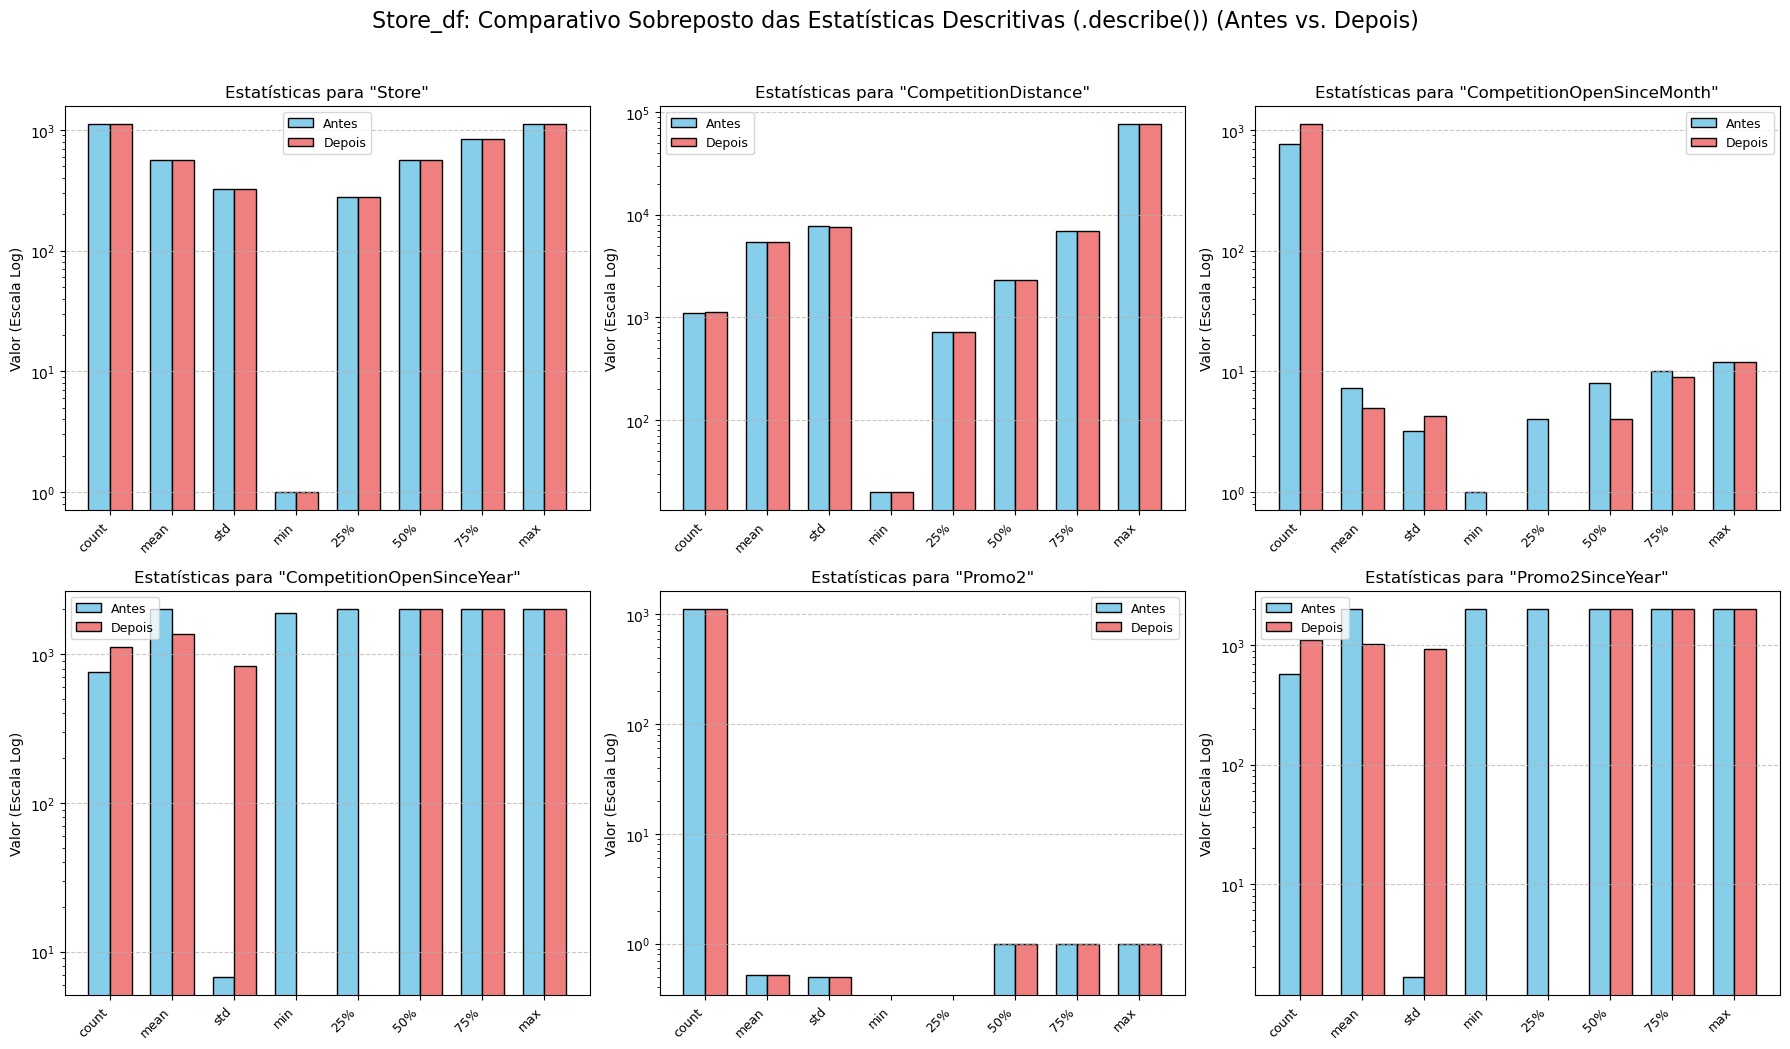

In [38]:
# Dados do describe() de store_df ANTES do pré-processamento
data_store_before_dict = {
    'Store': {'count': 1115.0, 'mean': 558.0, 'std': 322.017080, 'min': 1.0, '25%': 279.5, '50%': 558.0, '75%': 836.5, 'max': 1115.0},
    'CompetitionDistance': {'count': 1112.0, 'mean': 5404.901079, 'std': 7663.174720, 'min': 20.0, '25%': 717.5, '50%': 2325.0, '75%': 6882.5, 'max': 75860.0},
    'CompetitionOpenSinceMonth': {'count': 761.0, 'mean': 7.224704, 'std': 3.212348, 'min': 1.0, '25%': 4.0, '50%': 8.0, '75%': 10.0, 'max': 12.0},
    'CompetitionOpenSinceYear': {'count': 761.0, 'mean': 2008.660972, 'std': 6.789626, 'min': 1900.0, '25%': 2006.0, '50%': 2010.0, '75%': 2013.0, 'max': 2015.0},
    'Promo2': {'count': 1115.0, 'mean': 0.512108, 'std': 0.500078, 'min': 0.0, '25%': 0.0, '50%': 1.0, '75%': 1.0, 'max': 1.0},
    'Promo2SinceYear': {'count': 571.0, 'mean': 2011.763573, 'std': 1.673605, 'min': 2009.0, '25%': 2011.0, '50%': 2012.0, '75%': 2013.0, 'max': 2015.0}
}
desc_store_before_df = pd.DataFrame(data_store_before_dict)

# Dados do describe() de store_df DEPOIS do pré-processamento
data_store_after_dict = {
    'Store': {'count': 1115.0, 'mean': 558.0, 'std': 322.017080, 'min': 1.0, '25%': 279.5, '50%': 558.0, '75%': 836.5, 'max': 1115.0},
    'CompetitionDistance': {'count': 1115.0, 'mean': 5404.901079, 'std': 7652.849306, 'min': 20.0, '25%': 720.0, '50%': 2330.0, '75%': 6875.0, 'max': 75860.0},
    'CompetitionOpenSinceMonth': {'count': 1115.0, 'mean': 4.930942, 'std': 4.284924, 'min': 0.0, '25%': 0.0, '50%': 4.0, '75%': 9.0, 'max': 12.0},
    'CompetitionOpenSinceYear': {'count': 1115.0, 'mean': 1361.672646, 'std': 832.201390, 'min': 0.0, '25%': 0.0, '50%': 2005.0, '75%': 2011.0, 'max': 2015.0},
    'Promo2': {'count': 1115.0, 'mean': 0.512108, 'std': 0.500078, 'min': 0.0, '25%': 0.0, '50%': 1.0, '75%': 1.0, 'max': 1.0},
    'Promo2SinceYear': {'count': 1115.0, 'mean': 1031.252018, 'std': 931.671073, 'min': 0.0, '25%': 0.0, '50%': 2009.0, '75%': 2013.0, 'max': 2015.0}
}
desc_store_after_df = pd.DataFrame(data_store_after_dict)

# Configuração do plot
# Colunas para plotar (as que estão presentes em ambos e são numéricas no describe)
columns_to_plot = desc_store_before_df.columns.tolist()
stats_to_plot = desc_store_before_df.index.tolist()

ncols_grid = 3
nrows_grid = int(np.ceil(len(columns_to_plot) / ncols_grid))

fig, axes = plt.subplots(nrows=nrows_grid, ncols=ncols_grid, figsize=(18, nrows_grid * 5.5))
axes = axes.flatten()

# Configuração das barras
bar_width = 0.35
x_pos_stats = np.arange(len(stats_to_plot))

# Plotar cada coluna
for i, col_name in enumerate(columns_to_plot):
    ax = axes[i]

    # Obter valores antes e depois
    values_before = desc_store_before_df[col_name]
    # .get() é usado caso alguma coluna estivesse no 'before' mas não no 'after' (não é o caso aqui)
    values_after = desc_store_after_df.get(col_name, pd.Series(np.nan, index=stats_to_plot))

    # Plotar barras
    ax.bar(x_pos_stats - bar_width/2, values_before, bar_width, label='Antes', color='skyblue', edgecolor='black')
    ax.bar(x_pos_stats + bar_width/2, values_after, bar_width, label='Depois', color='lightcoral', edgecolor='black')

    # Configurar rótulos e aparência
    ax.set_title(f'Estatísticas para "{col_name}"', fontsize=12)
    ax.set_ylabel('Valor', fontsize=10)
    ax.set_xticks(x_pos_stats)
    ax.set_xticklabels(stats_to_plot, rotation=45, ha="right", fontsize=9)
    ax.legend(fontsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # --- Heurística para escala logarítmica (mesma lógica usada para vendas_df) --- Opcional
    combined_values = pd.concat([values_before, values_after]).dropna()
    if not combined_values.empty:
        non_count_stats_series = combined_values.drop('count', errors='ignore').abs()
        non_count_stats_max = non_count_stats_series.max() if not non_count_stats_series.empty else 0.0
        if pd.isna(non_count_stats_max): non_count_stats_max = 0.0

        has_count = 'count' in combined_values.index
        current_count_val_for_comparison = 0.0
        if has_count:
            _counts_from_combined = combined_values.loc['count']
            if isinstance(_counts_from_combined, pd.Series):
                current_count_val_for_comparison = _counts_from_combined.max() if not _counts_from_combined.empty else 0.0
            else:
                current_count_val_for_comparison = _counts_from_combined
            if pd.isna(current_count_val_for_comparison): current_count_val_for_comparison = 0.0

        condition_large_count = False
        if has_count:
            if non_count_stats_max == 0 and current_count_val_for_comparison > 0:
                condition_large_count = True
            elif non_count_stats_max > 0 and current_count_val_for_comparison > non_count_stats_max * 10:
                condition_large_count = True

        min_abs_val = combined_values.abs().min() if not combined_values.abs().empty else 0.0
        if pd.isna(min_abs_val): min_abs_val = 0.0

        condition_large_max = False
        if pd.notna(non_count_stats_max) and non_count_stats_max > 1000:
             if pd.notna(min_abs_val) and min_abs_val >= 0:
                 condition_large_max = True

        if condition_large_count or condition_large_max:
            ax.set_yscale('log')
            ax.set_ylabel('Valor (Escala Log)', fontsize=10)
    # --- Fim da heurística ---

# Remover eixos não utilizados
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Configurar título e layout
fig.suptitle('Store_df: Comparativo Sobreposto das Estatísticas Descritivas (.describe()) (Antes vs. Depois)', fontsize=16) # Ajuste o y se necessário
plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Ajuste para o suptitle

plt.show()


## Análise do Gráfico Comparativo das Estatísticas de `store_df` (Antes vs. Depois do Pré-processamento)

---

### 1. Estatísticas para `"Store"`
* **`count`**: Permaneceu constante em 1115 para "Antes" e "Depois".
    * **Implicação**: Correto, pois o `store_df` tem uma entrada por loja e nenhuma loja foi removida; apenas valores internos foram preenchidos.
* **`mean`, `std`, `min`, `25%`, `50%`, `75%`, `max`**: Todos os valores para estas estatísticas permaneceram idênticos entre "Antes" e "Depois".
    * **Implicação**: A imputação de valores em *outras* colunas não afeta as estatísticas descritivas do identificador da loja (`Store ID`).

---

### 2. Estatísticas para `"CompetitionDistance"`
* **`count`**: Aumentou de 1112 (Antes) para 1115 (Depois).
    * **Implicação**: Os 3 valores NaN foram preenchidos com sucesso pela média.
* **`mean`**: Permaneceu praticamente idêntico (~5404.90).
    * **Implicação**: Esperado, pois os NaNs foram preenchidos com a própria média.
* **`std`**: Teve uma pequena redução de ~7663 (Antes) para ~7653 (Depois).
* **`min`, `max`**: Permaneceram os mesmos.
* **Quartis (`25%`, `50%`, `75%`)**: Apresentaram pequenas alterações. Por exemplo, a mediana (`50%`) mudou de 2325 para 2330.
    * **Implicação**: A imputação pela média, mesmo para poucos valores, pode afetar levemente o desvio padrão e os quartis, pois os valores imputados se concentram na média, podendo alterar a forma da distribuição sutilmente.

---

### 3. Estatísticas para `"CompetitionOpenSinceMonth"`
* **`count`**: Aumentou consideravelmente de 761 (Antes) para 1115 (Depois).
    * **Implicação**: Os 354 valores NaN foram preenchidos com `0`.
* **`mean`**: Diminuiu de ~7.22 (Antes) para ~4.93 (Depois).
* **`std`**: Aumentou de ~3.21 (Antes) para ~4.28 (Depois).
* **`min`**: Mudou de 1 (Antes) para 0 (Depois).
* **`25%`**: Mudou de 4 (Antes) para 0 (Depois).
* **`50%` (Mediana)**: Diminuiu de 8 (Antes) para 4 (Depois).
    * **Implicação**: O preenchimento de uma grande quantidade de NaNs com `0` impactou significativamente todas as estatísticas. O `0` (que não é um mês válido) agora influencia fortemente a média, mediana e introduz um novo mínimo. O aumento do desvio padrão reflete a introdução desses valores `0` distantes da média original dos meses válidos.

---

### 4. Estatísticas para `"CompetitionOpenSinceYear"`
* **`count`**: Aumentou de 761 (Antes) para 1115 (Depois).
    * **Implicação**: Os 354 valores NaN foram preenchidos com `0`.
* **`mean`**: Diminuiu drasticamente de ~2008.66 (Antes) para ~1361.67 (Depois).
* **`std`**: Aumentou enormemente de ~6.79 (Antes) para ~832.20 (Depois).
* **`min`**: Mudou de 1900 (Antes) para 0 (Depois).
* **`25%`**: Mudou de 2006 (Antes) para 0 (Depois).
* **`50%` (Mediana)**: Diminuiu de 2010 (Antes) para 2005 (Depois).
    * **Implicação**: Similar ao mês, preencher com `0` (que não é um ano válido neste contexto) alterou as estatísticas. A média e a mediana foram "puxadas" para baixo pelo grande número de zeros. O desvio padrão explodiu, indicando uma dispersão muito maior devido à presença de zeros junto com os anos reais (como 1900-2015). **Isso destaca a importância de tratar o `0` como um valor especial em análises futuras (se for o caso)**.

---

### 5. Estatísticas para `"Promo2"`
* **`count`, `mean`, `std`, `min`, `25%`, `50%`, `75%`, `max`**: Todas estas estatísticas permaneceram idênticas entre "Antes" e "Depois".
    * **Implicação**: A coluna `Promo2` não tinha valores ausentes e não foi alterada diretamente pelo pré-processamento das outras colunas. Suas características estatísticas (refletindo uma variável binária) foram preservadas.

---

### 6. Estatísticas para `"Promo2SinceWeek"`
* **`count`**: Aumentou de 571 (Antes) para 1115 (Depois).
    * **Implicação**: Os 544 valores NaN (provavelmente de lojas com `Promo2 == 0`) foram preenchidos com `0`.
* **`mean`**: Diminuiu de ~23.60 (Antes) para ~12.10 (Depois).
* **`std`**: Aumentou ligeiramente de ~13.97 (Antes) para ~15.03 (Depois).
* **`min`**: Mudou de 1 (Antes) para 0 (Depois).
* **`25%` e `50%` (Mediana)**: Mudaram para valores menores (0 e 1 respectivamente) devido à introdução dos zeros.
    * **Implicação**: O preenchimento com `0` (para indicar "não aplicável" quando `Promo2 == 0`) impactou as medidas de tendência central e o mínimo. O desvio padrão aumentou um pouco devido à maior dispersão causada pelos zeros.

---

### 7. Estatísticas para `"Promo2SinceYear"`
* **`count`**: Aumentou de 571 (Antes) para 1115 (Depois).
    * **Implicação**: Os 544 NaNs foram preenchidos com `0`.
* **`mean`**: Diminuiu significativamente de ~2011.76 (Antes) para ~1031.25 (Depois).
* **`std`**: Aumentou drasticamente de ~1.67 (Antes) para ~931.67 (Depois).
* **`min`**: Mudou de 2009 (Antes) para 0 (Depois).
* **`25%` e `50%` (Mediana)**: Foram fortemente reduzidos devido à introdução dos zeros.
    * **Implicação**: Assim como em `CompetitionOpenSinceYear`, o preenchimento com `0` alterou profundamente as estatísticas, especialmente a média e o desvio padrão. O `0` aqui representa "não aplicável" (para `Promo2 == 0`) e deve ser tratado com cuidado para não ser interpretado como um ano literal em cálculos.

---


# Merge dos DataSets (vendas_df + store_df)

In [39]:
vendas_df.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      2          5  2015-07-31   6064        625      1            0   
2      3          5  2015-07-31   8314        821      1            0   
3      4          5  2015-07-31  13995       1498      1            0   
4      5          5  2015-07-31   4822        559      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [40]:
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              0.0              0.0   
4                    2015.0       0              0.0              0.0   

     PromoInterval  
0                0  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3                0  
4                0

Observe que ambos os DataFrames (**`vendas_df` e `store_df`**) possuem o atributo `store` em comum. Assim, podemos uni-los utilizando essa coluna como chave para realizar operações de junção e acessar informações combinadas de forma integrada.

In [41]:
df_completo = pd.merge(vendas_df, store_df, how = 'inner', on='Store')
df_completo.shape

(844392, 17)

In [42]:
df_completo.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      2          5  2015-07-31   6064        625      1            0   
2      3          5  2015-07-31   8314        821      1            0   
3      4          5  2015-07-31  13995       1498      1            0   
4      5          5  2015-07-31   4822        559      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              0.0              0.0                0  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              0.0              0.0                0  
4              0.0              0.0                0

In [43]:
df_completo.tail()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
844387    682          2  2013-01-01   3375        566      0            a   
844388    733          2  2013-01-01  10765       2377      0            a   
844389    769          2  2013-01-01   5035       1248      0            a   
844390    948          2  2013-01-01   4491       1039      0            a   
844391   1097          2  2013-01-01   5961       1405      0            a   

        SchoolHoliday StoreType Assortment  CompetitionDistance  \
844387              1         b          a                150.0   
844388              1         b          b                860.0   
844389              1         b          b                840.0   
844390              1         b          b               1430.0   
844391              1         b          b                720.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
844387                        9.0                    2006.0       0   
844388                       10.0                    1999.0       0   
844389                        0.0                       0.0       1   
844390                        0.0                       0.0       0   
844391                        3.0                    2002.0       0   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
844387              0.0              0.0                0  
844388              0.0              0.0                0  
844389             48.0           2012.0  Jan,Apr,Jul,Oct  
844390              0.0              0.0                0  
844391              0.0              0.0                0

## Matriz de Correlação

Após a união dos datasets de vendas e lojas, é fundamental entendermos **como as diferentes variáveis numéricas se relacionam entre si**. A **matriz de correlação** é uma ferramenta estatística poderosa para essa finalidade.

**Para que serve?**
* A matriz de correlação quantifica a **relação linear** entre pares de variáveis numéricas.
* Os coeficientes de correlação variam de **-1 a +1**:
    * **+1**: Correlação linear positiva perfeita (quando uma variável aumenta, a outra também aumenta proporcionalmente).
    * **-1**: Correlação linear negativa perfeita (quando uma variável aumenta, a outra diminui proporcionalmente).
    * **0**: Nenhuma correlação linear entre as variáveis.
* Valores próximos de +1 ou -1 indicam uma relação linear forte, enquanto valores próximos de 0 indicam uma relação linear fraca ou inexistente.

**Como ajudará na sua análise?**
* **Identificar Multicolinearidade**: Altas correlações entre variáveis preditoras (features) podem indicar multicolinearidade, o que pode ser problemático para alguns algoritmos de Machine Learning (como regressão linear), inflando a variância dos coeficientes estimados.
* **Relação com a Variável Alvo**: Podemos observar quais variáveis têm uma correlação linear mais forte (positiva ou negativa) com as `Sales` (Vendas), o que pode dar insights iniciais sobre potenciais preditores.
* **Entendimento do Dataset**: Descobrir relações, às vezes inesperadas, entre diferentes variáveis, aprofundando o conhecimento sobre a dinâmica do negócio.
* **Seleção de Features**: Pode auxiliar na decisão de quais features manter ou remover, especialmente se houver features altamente correlacionadas que fornecem informação redundante.

Para facilitar a interpretação, a matriz de correlação é frequentemente visualizada como um **heatmap** (mapa de calor), onde as cores representam a força e a direção da correlação.

**Nota importante sobre variáveis imputadas com `0`**: Lembre-se que algumas colunas como `CompetitionOpenSinceMonth/Year` e `Promo2SinceWeek/Year` tiveram valores NaN preenchidos com `0`. Embora o `0` seja tratado como um número no cálculo da correlação, ele representa um caso especial ("não aplicável" ou "desconhecido"). As correlações envolvendo estas colunas devem ser interpretadas com cautela, pois os `0`s podem influenciar os coeficientes de maneiras que não refletem uma relação linear típica com os valores não nulos originais.

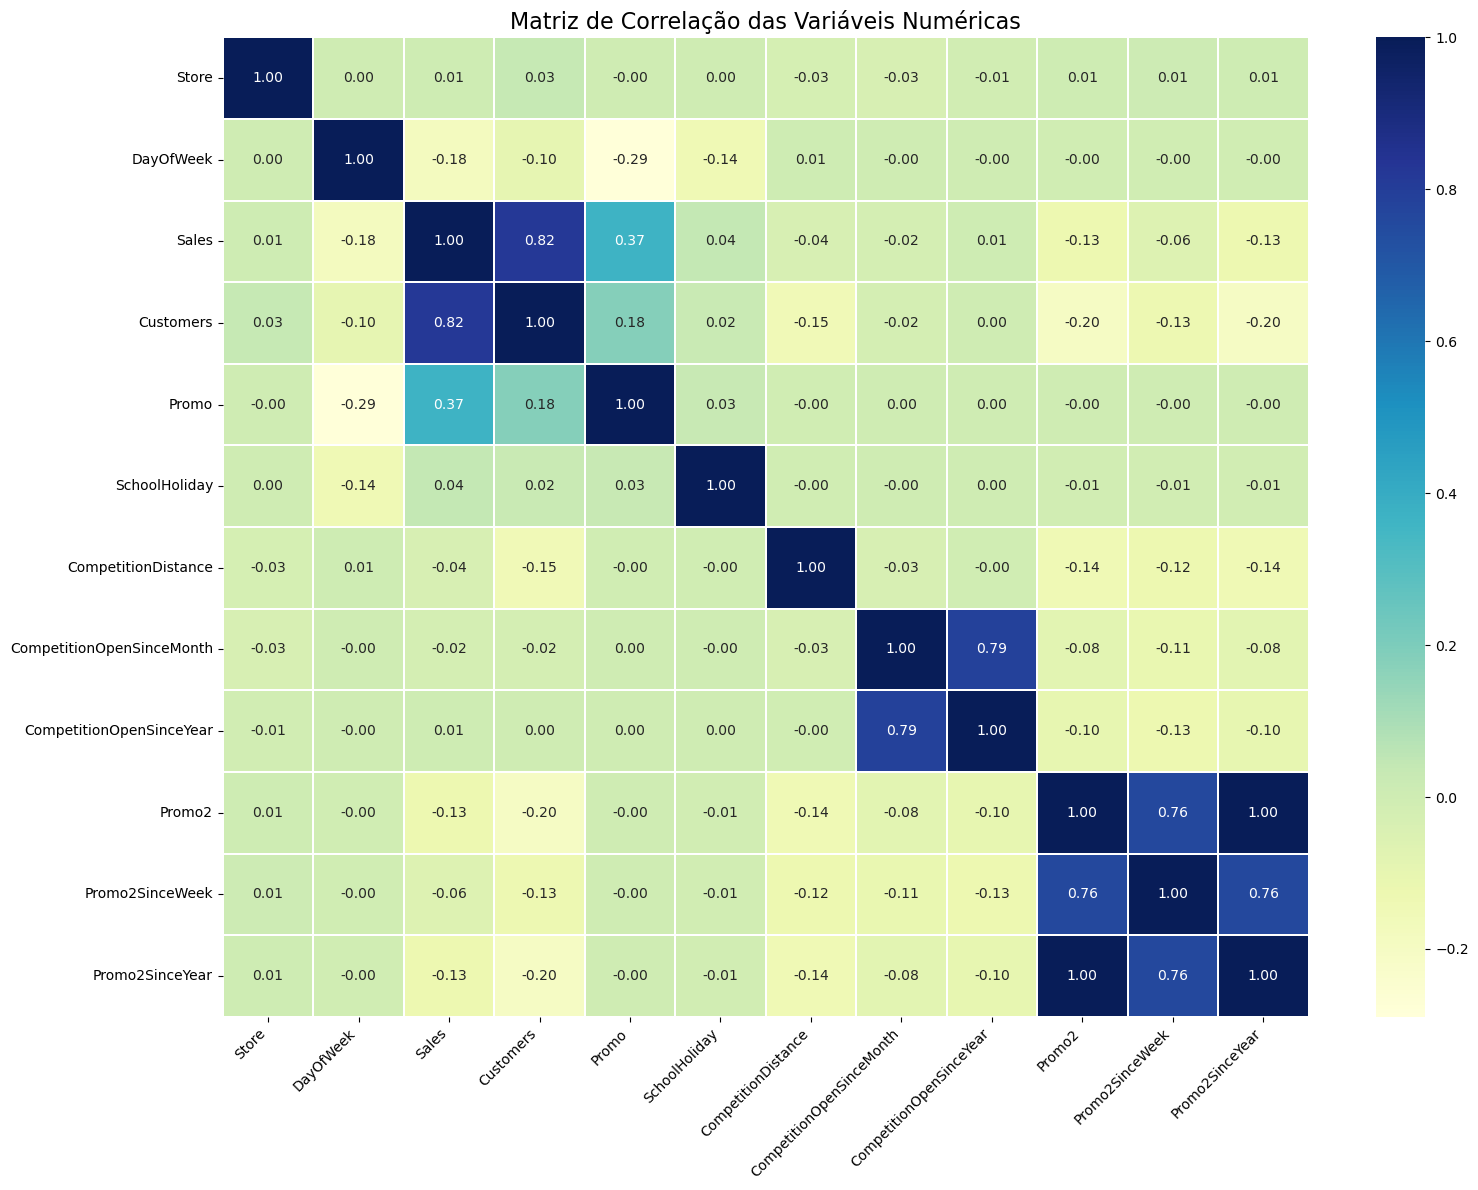

In [44]:
# 1. Selecionar apenas as colunas numéricas para o cálculo da correlação
df_numerico = df_completo.select_dtypes(include=np.number)

# 2. Calcular a matriz de correlação
matriz_correlacao = df_numerico.corr()

# 3. Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(16, 12)) # Ajuste o tamanho conforme necessário
sns.heatmap(matriz_correlacao,
            annot=True,        # Mostrar os valores de correlação no mapa
            fmt=".2f",         # Formatar os valores com duas casas decimais
            cmap='YlGnBu',   # Escolher um mapa de cores (coolwarm é bom para correlações)
            linewidths=.10,     # Linhas entre as células
            cbar=True)         # Mostrar a barra de cores
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() # Ajusta o layout para evitar sobreposição

### Análise da Matriz de Correlação do `df_completo`

A matriz de correlação nos ajuda a entender as relações lineares entre as variáveis numéricas do seu conjunto de dados combinado. Vamos observar os principais pontos:

#### Relação com `Sales` (Vendas):
* **`Customers` (Clientes) e `Sales`**: Apresentam uma **correlação positiva muito forte de 0.82**.
    * **Interpretação**: Esta é a correlação mais expressiva e esperada. Indica que, em geral, um aumento no número de clientes está fortemente associado a um aumento nas vendas, e vice-versa. É uma relação direta e fundamental para o negócio.
* **`Promo` (Promoção ativa no dia) e `Sales`**: Correlação positiva moderada de **0.37**.
    * **Interpretação**: Sugere que os dias com promoção (`Promo == 1`) tendem a ter vendas mais altas. Embora não seja uma relação extremamente forte, indica um impacto positivo das promoções diárias nas vendas.
* **`DayOfWeek` (Dia da Semana) e `Sales`**: Correlação negativa fraca de **-0.18**.
    * **Interpretação**: Indica uma leve tendência de certos dias da semana (valores mais altos, como o fim de semana, lembrando que 7=domingo) terem vendas menores, ou dias no início da semana (valores menores) terem vendas ligeiramente maiores. Isso pode ser influenciado pelo fato de que o dataset já foi filtrado para lojas abertas, e os padrões de fechamento/abertura nos fins de semana podem variar.
* **`Promo2` (Promoção contínua) e `Sales`**: Correlação negativa fraca de **-0.13**.
    * **Interpretação**: Sugere que as lojas que participam da Promo2 (`Promo2 == 1`) têm, em média, vendas ligeiramente menores. Isso é um ponto interessante que pode merecer investigação mais aprofundada (ex: a Promo2 é menos eficaz? Ou é adotada por lojas com perfil de vendas diferente?).
* **`Promo2SinceYear` e `Sales`**: Correlação negativa fraca de **-0.13**.
    * **Interpretação**: Similar à `Promo2`. Dado que `Promo2SinceYear` foi preenchido com `0` quando `Promo2 == 0`, esta correlação está fortemente ligada à anterior.
* **Outras variáveis com `Sales`**: `SchoolHoliday` (0.04), `CompetitionDistance` (-0.04), `CompetitionOpenSinceMonth` (-0.02), `CompetitionOpenSinceYear` (0.01), `Store` (0.01), `Promo2SinceWeek` (-0.06) mostram correlações lineares muito fracas com `Sales`, indicando pouca influência linear direta dessas variáveis sobre as vendas quando consideradas isoladamente desta forma.

### Relação com `Customers` (Clientes):
* Além da forte correlação com `Sales` (0.82), temos:
* **`Promo` e `Customers`**: Correlação positiva fraca de **0.18**.
    * **Interpretação**: Dias com promoção também tendem a atrair um pouco mais de clientes.
* **`Promo2` e `Customers`**: Correlação negativa fraca de **-0.20**.
    * **Interpretação**: Lojas com Promo2 tendem a ter um pouco menos de clientes, similar ao observado com `Sales`.
* **`CompetitionDistance` e `Customers`**: Correlação negativa fraca de **-0.15**.
    * **Interpretação**: Há uma leve tendência de que lojas com competidores mais distantes tenham um pouco menos de clientes, ou lojas com competidores mais próximos tenham um pouco mais. Isso é contraintuitivo se um competidor próximo "rouba" clientes. Talvez competidores próximos indiquem áreas de maior movimento geral.

### Outras Correlações Notáveis e Pontos de Atenção:
* **`Promo2` e `Promo2SinceYear`**: Apresentam uma **correlação perfeita de 1.00**. Da mesma forma, `Promo2SinceYear` com `Promo2` é 1.00.
    * **Interpretação Cautelosa**: Esta correlação perfeita é um **artefato da imputação**. Como `Promo2SinceYear` foi preenchido com `0` quando `Promo2 == 0`, e possui valores de ano (ex: >2000) quando `Promo2 == 1`, a variável `Promo2` e a `Promo2SinceYear` (após imputação) se tornam perfeitamente distinguíveis em conjunto por esses zeros. Se uma é `0`, a outra também é `0` (para os casos imputados), e se `Promo2` é `1`, `Promo2SinceYear` é um ano > 0. O cálculo da correlação de Pearson interpreta essa co-ocorrência dos zeros e a separação dos não-zeros como uma relação linear perfeita.
* **`Promo2` e `Promo2SinceWeek`**: Correlação de **0.60**.
    * **Interpretação**: Relação positiva moderada, também influenciada pela imputação de `Promo2SinceWeek` com `0` quando `Promo2 == 0`.
* **`DayOfWeek` e `Promo`**: Correlação negativa de **-0.29**.
    * **Interpretação**: Sugere que as promoções (`Promo == 1`) são menos prováveis em certos dias da semana (valores mais altos de `DayOfWeek`) ou mais prováveis em outros (valores mais baixos).
* **Colunas de Data de Abertura da Competição**: `CompetitionOpenSinceMonth` e `CompetitionOpenSinceYear` têm uma correlação positiva moderada de **0.43**. Isso é parcialmente esperado, pois meses posteriores em um ano podem se alinhar com o próprio aumento do ano, mas também é fortemente influenciado pelos muitos pares `(0,0)` resultantes da imputação. As correlações dessas duas colunas com outras variáveis são geralmente muito fracas, o que faz sentido dado que o `0` imputado não carrega um significado ordinal real de tempo para muitos registros.

### Conclusões da Análise da Matriz de Correlação:
* A relação mais forte e mais importante para o negócio é entre `Customers` e `Sales`.
* Promoções diárias (`Promo`) parecem ter um impacto positivo tanto nas vendas quanto no número de clientes.
* A `Promo2` e suas datas associadas (após imputação) mostram correlações negativas fracas com `Sales` e `Customers`, o que levanta questões sobre sua efetividade ou sobre o perfil das lojas que a utilizam. A interpretação dessas correlações, no entanto, deve ser feita com extrema cautela devido à grande quantidade de zeros imputados que representam "não aplicável" ou "ausente".
* A distância da competição (`CompetitionDistance`) tem uma correlação linear muito fraca com `Sales`, mas uma correlação negativa um pouco mais notável (ainda que fraca) com `Customers`.
* Não foram identificadas correlações extremamente altas (ex: >0.9 ou <-0.9) entre features preditoras independentes que sugerissem multicolinearidade severa imediata, exceto nos casos artefatuais da imputação (como `Promo2` e `Promo2SinceYear`).



Valores de correlação com Sales (ordenados):
Customers                    0.823597
Promo                        0.368145
SchoolHoliday                0.038617
Store                        0.007710
CompetitionOpenSinceYear     0.005266
CompetitionOpenSinceMonth   -0.018370
CompetitionDistance         -0.036343
Promo2SinceWeek             -0.058476
Promo2                      -0.127596
Promo2SinceYear             -0.127621
DayOfWeek                   -0.178736
Name: Sales, dtype: float64


/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_64171/3447682064.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


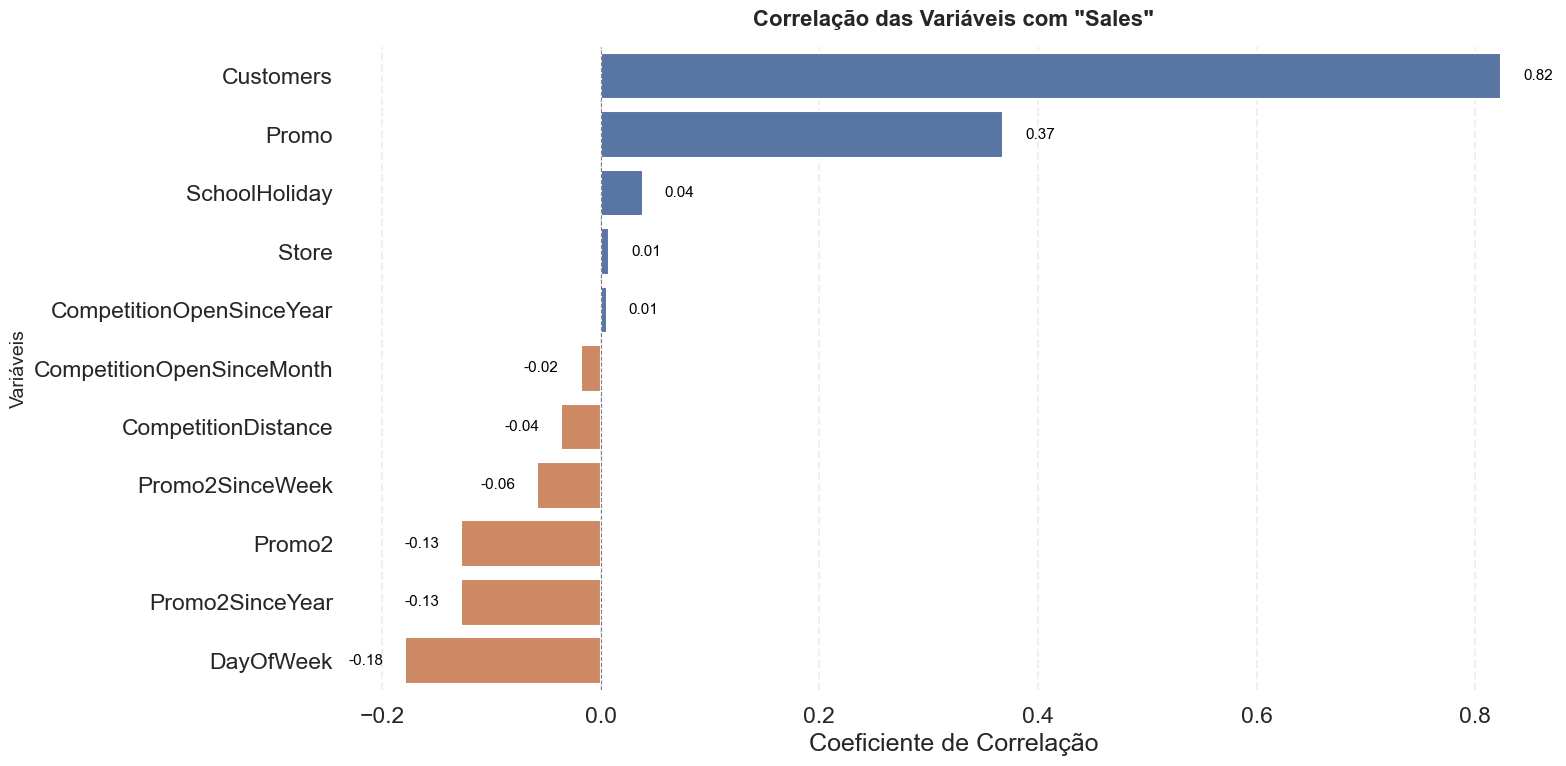

In [45]:
sns.set_style("whitegrid")
sns.set_context("talk")  # melhora fontes para apresentações

# Gerar ou carregar matriz de correlação
if 'matriz_correlacao' not in locals() and 'df_completo' in locals():
    df_numerico = df_completo.select_dtypes(include=np.number)
    matriz_correlacao = df_numerico.corr()
elif 'matriz_correlacao' not in locals():
    print("Erro: 'matriz_correlacao' ou 'df_completo' não definidos. Criando matriz dummy.")
    data_dummy = {
        'Sales': np.random.rand(100), 'Customers': np.random.rand(100),
        'Promo': np.random.randint(0, 2, 100),
        'OtherFeature': np.random.rand(100)*10
    }
    df_dummy_completo = pd.DataFrame(data_dummy)
    matriz_correlacao = df_dummy_completo.corr()

# Análise de correlação com 'Sales'
if 'Sales' in matriz_correlacao.columns:
    corr_com_sales = matriz_correlacao['Sales'].drop('Sales', errors='ignore').sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(16, 8))
    colors = ['#4C72B0' if x > 0 else '#DD8452' for x in corr_com_sales]

    bars = sns.barplot(
        x=corr_com_sales.values,
        y=corr_com_sales.index,
        palette=colors,
        orient='h'
    )

    # Título e rótulos com tipografia suave
    plt.title('Correlação das Variáveis com "Sales"', fontsize=16, weight='bold', pad=15)
    plt.xlabel('Coeficiente de Correlação', fontsize=18)
    plt.ylabel('Variáveis', fontsize=14)

    # Adiciona valores nas barras
    for bar in bars.patches:
        width = bar.get_width()
        ha = 'left' if width > 0 else 'right'
        offset = 0.02 if width > 0 else -0.02
        plt.text(
            width + offset,
            bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}',
            va='center',
            ha=ha,
            fontsize=11,
            color='black'
        )

    # Melhorias estéticas extras
    plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()

    print("\nValores de correlação com Sales (ordenados):")
    print(corr_com_sales)

else:
    print("A coluna 'Sales' não foi encontrada na matriz de correlação.")


# Engenharia de Features:

## Dividindo `Date` em (day, month, year):

In [46]:
df_completo['Year'] = pd.DatetimeIndex(df_completo['Date']).year
df_completo['Month'] = pd.DatetimeIndex(df_completo['Date']).month
df_completo['Day'] = pd.DatetimeIndex(df_completo['Date']).day

In [47]:
df_completo.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      2          5  2015-07-31   6064        625      1            0   
2      3          5  2015-07-31   8314        821      1            0   
3      4          5  2015-07-31  13995       1498      1            0   
4      5          5  2015-07-31   4822        559      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  
0              0.0              0.0                0  2015      7   31  
1             13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31  
2             14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31  
3              0.0              0.0                0  2015      7   31  
4              0.0              0.0                0  2015      7   31

## 1. Média de Vendas por Mês
* **Observação Visual**: O gráfico de linha mostra a média de vendas para cada mês (1 a 12). As vendas começam em um nível mais baixo em Janeiro e Fevereiro, sobem atingindo um pico intermediário por volta de Março-Abril, apresentam uma leve queda e depois um segundo platô entre Maio e Julho. Após Julho, há uma queda mais acentuada até Setembro/Outubro, seguida por um aumento muito expressivo em Novembro e, **especialmente, Dezembro, que é o mês com a maior média de vendas.**
* **Interpretação**:
    * **Sazonalidade Clara**: Existe uma forte sazonalidade mensal nas vendas.
    * **Pico de Fim de Ano**: Dezembro se destaca como o mês de maiores vendas, o que é esperado devido às compras de Natal. Novembro também mostra um aumento significativo, possivelmente impulsionado por promoções de pré-Natal (como Black Friday, se aplicável ao contexto do dataset/período) ou o início das compras festivas.
    * **Início de Ano Mais Fraco**: Janeiro e Fevereiro são os meses com as médias de vendas mais baixas, o que é comum no varejo após o período de festas.
    * **Páscoa/Primavera (?)**: O pico em Março/Abril pode estar relacionado a eventos como a Páscoa ou o início da primavera (dependendo do hemisfério e costumes locais, lembrando que os dados são da Alemanha).

---

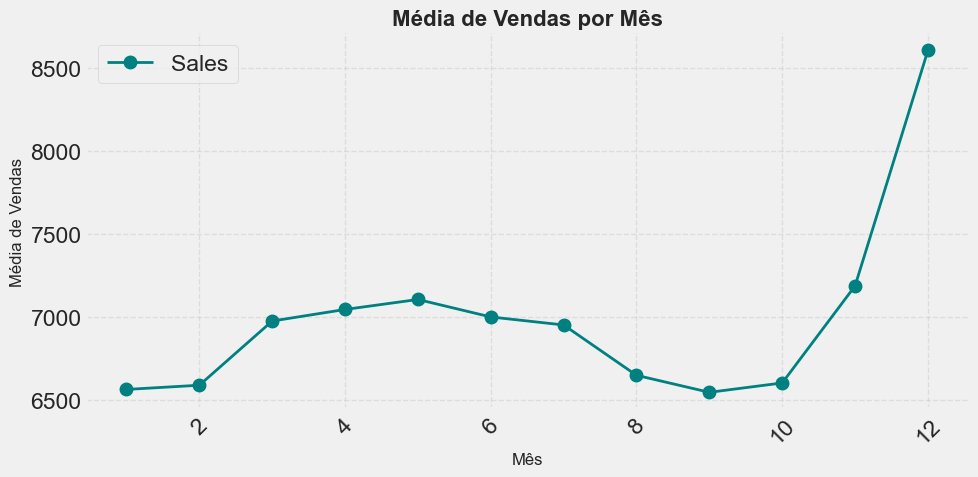

In [48]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('Month')[['Sales']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Vendas por Mês', fontsize=16, fontweight='bold')
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Média de Vendas', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## 2. Média de Clientes por Mês
* **Observação Visual**: O padrão da média de clientes por mês é muito similar ao da média de vendas. Inicia baixo em Janeiro/Fevereiro, sobe para um pico em Março/Abril, estabiliza com uma leve queda até Julho, cai mais em Agosto/Setembro/Outubro e depois tem um forte aumento em Novembro e um pico expressivo em Dezembro.
* **Interpretação**:
    * **Sazonalidade Consistente**: O fluxo de clientes acompanha de perto a sazonalidade das vendas, o que é esperado. Mais clientes geralmente resultam em mais vendas.
    * **Pico de Fim de Ano**: Dezembro também é o mês com a maior média de clientes.
    * **Início de Ano Mais Calmo**: Janeiro e Fevereiro registram o menor movimento de clientes.
    * A correlação forte entre `Sales` e `Customers` (0.82, observada anteriormente) é visualmente confirmada por esses padrões sazonais paralelos.

---

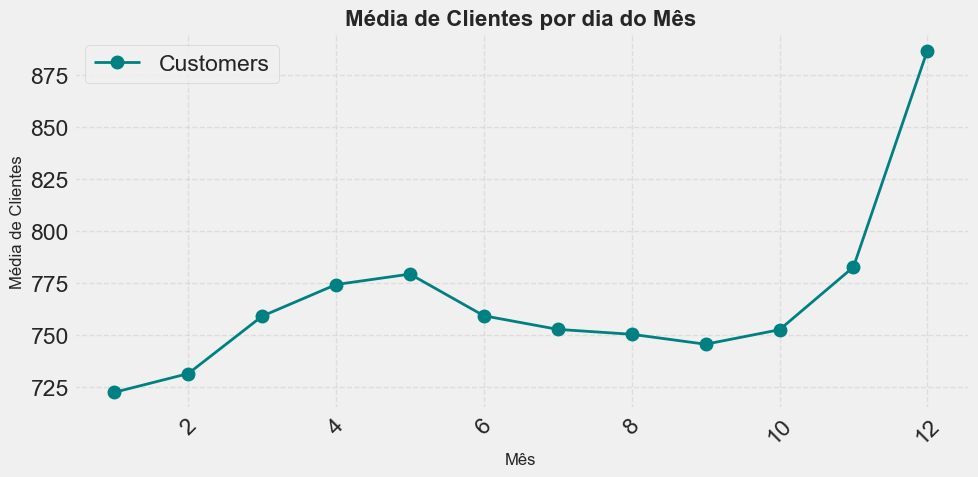

In [49]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('Month')[['Customers']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Clientes por dia do Mês', fontsize=16, fontweight='bold')
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Média de Clientes', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## 3. Média de Vendas por Dia do Mês
* **Observação Visual**: O gráfico mostra a variação da média de vendas ao longo dos dias do mês (1 a 31). Há uma tendência de vendas mais altas no início do mês (aproximadamente dias 1-5). Depois, há uma queda e as vendas permanecem em um nível mais baixo, com alguma flutuação, durante a maior parte do meio do mês. Parece haver um pequeno aumento nas vendas no final do mês (próximo ao dia 30/31), mas menos pronunciado que no início.
* **Interpretação**:
    * **Efeito de Início de Mês/Pagamento**: As vendas mais altas no início do mês são um padrão clássico no varejo, frequentemente associado ao recebimento de salários pela população.
    * **Variações Menores no Meio do Mês**: O período intermediário do mês parece ter vendas mais estáveis, porém mais baixas.
    * **Pequeno Repique no Fim do Mês**: Pode haver um leve aumento no final do mês, talvez relacionado a compras antes do próximo ciclo de pagamento ou promoções específicas.

---

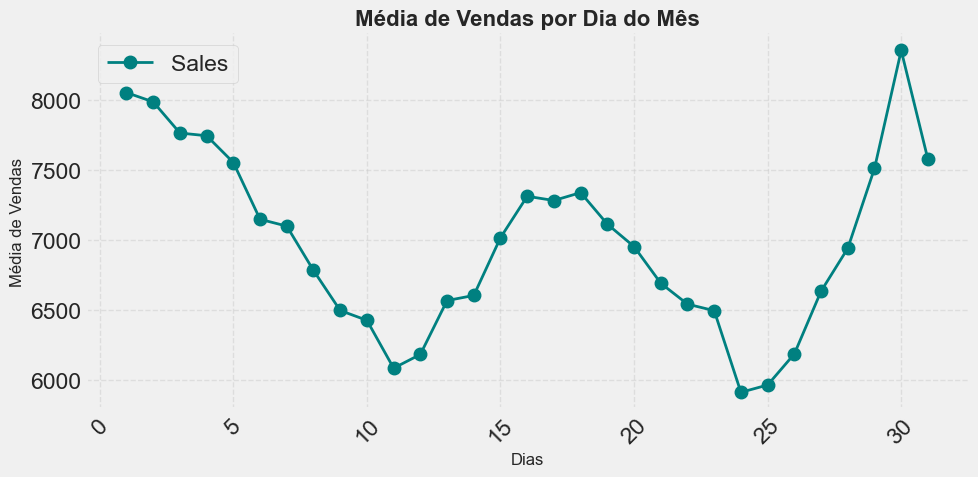

In [50]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('Day')[['Sales']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Vendas por Dia do Mês', fontsize=16, fontweight='bold')
ax.set_xlabel('Dias', fontsize=12)
ax.set_ylabel('Média de Vendas', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## 4. Média de Clientes por Dia do Mês
* **Observação Visual**: O padrão da média de clientes por dia do mês espelha o padrão das vendas. Um número maior de clientes é observado no início do mês, seguido por uma queda e estabilização em um nível mais baixo, com um leve aumento no final do mês.
* **Interpretação**:
    * **Fluxo de Clientes e Vendas Alinhados**: Assim como na análise mensal, o fluxo de clientes acompanha o padrão de vendas diárias, reforçando a ideia de que o volume de clientes é um motor direto das vendas. O efeito de início de mês também é visível no número de clientes.

---

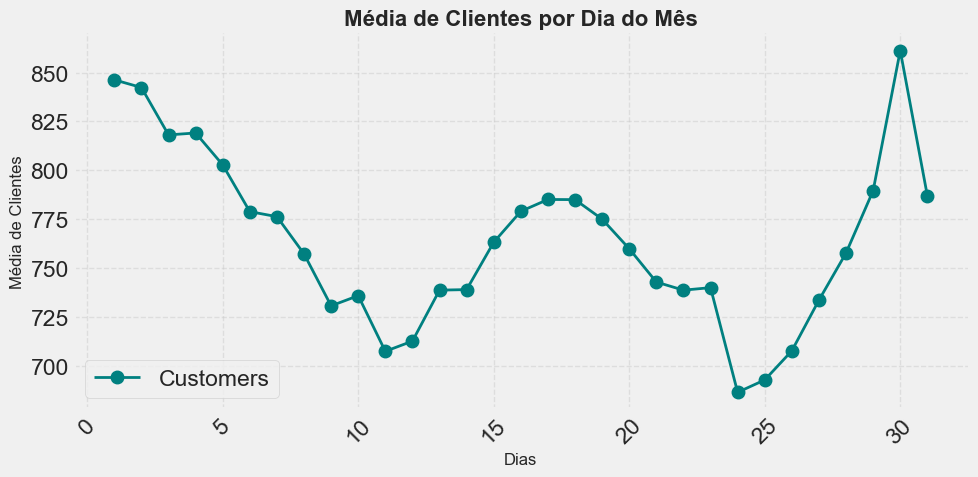

In [51]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('Day')[['Customers']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Clientes por Dia do Mês', fontsize=16, fontweight='bold')
ax.set_xlabel('Dias', fontsize=12)
ax.set_ylabel('Média de Clientes', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## 5. Média de Vendas por Dia da Semana
* **Observação Visual**: O gráfico mostra a média de vendas para cada dia da semana (1=Segunda, ..., 7=Domingo). As vendas parecem ser mais altas no início da semana (Segunda-feira, dia 1), caem um pouco na Terça e Quarta, e depois se mantêm relativamente estáveis ou com leve aumento até Sexta/Sábado. Domingo (dia 7) tem a média de vendas mais baixa entre os dias em que as lojas estão abertas (lembre-se que o dataset foi filtrado para `Open==1`).
* **Interpretação**:
    * **Segunda-feira Forte**: Surpreendentemente, Segunda-feira (dia 1) aparece como um dia de vendas médias elevadas. Isso pode ser devido a vários fatores, como reposição de estoque após o fim de semana, ou ser o primeiro dia de promoções semanais para algumas lojas.
    * **Domingo Fraco (quando aberto)**: Mesmo para as lojas que abrem aos domingos, as vendas médias são as mais baixas, o que é comum em muitos contextos de varejo devido a horários reduzidos ou menor fluxo de consumidores.
    * **Meio da Semana e Sábado**: Os outros dias da semana apresentam um comportamento intermediário.

---


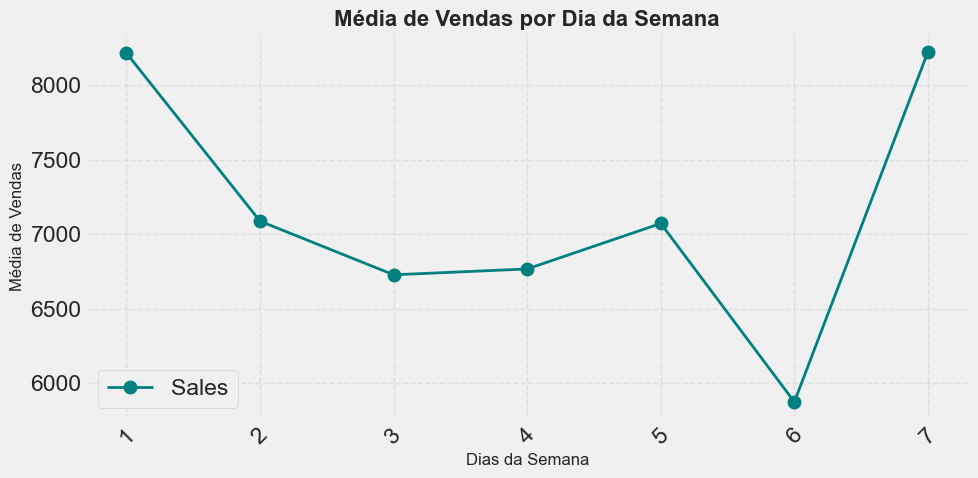

In [52]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('DayOfWeek')[['Sales']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Vendas por Dia da Semana', fontsize=16, fontweight='bold')
ax.set_xlabel('Dias da Semana', fontsize=12)
ax.set_ylabel('Média de Vendas', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()


## 6. Média de Clientes por Dia da Semana
* **Observação Visual**: O padrão da média de clientes por dia da semana acompanha de perto o padrão de vendas. Segunda-feira (dia 1) tem a maior média de clientes, seguido por uma queda e depois uma certa estabilidade/aumento nos dias subsequentes, com Domingo (dia 7) apresentando o menor fluxo de clientes entre os dias de loja aberta.
* **Interpretação**:
    * **Consistência com Vendas**: Confirma que os dias com maior movimento de clientes tendem a ser os dias de maiores vendas. A Segunda-feira se destaca tanto em clientes quanto em vendas.
    * **Padrão Semanal**: O padrão semanal de fluxo de clientes é um fator determinante para o padrão semanal de vendas.

---


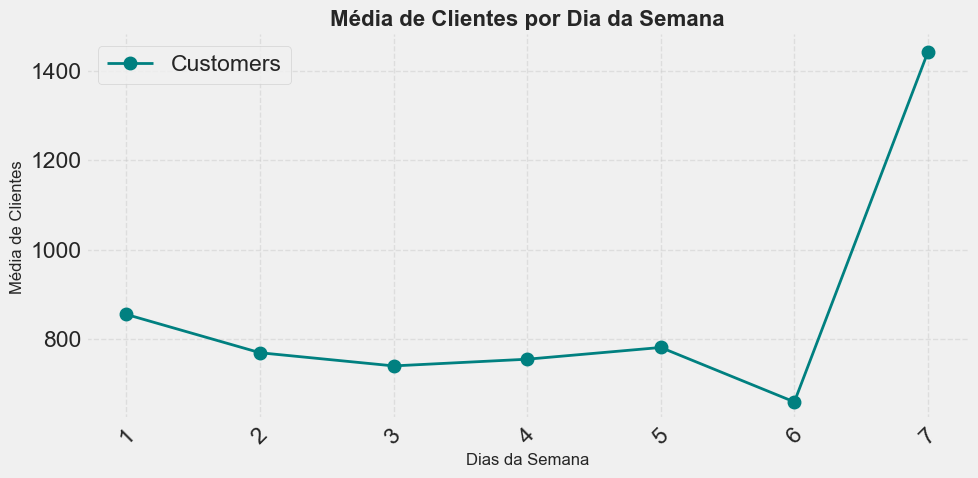

In [53]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('DayOfWeek')[['Customers']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Clientes por Dia da Semana', fontsize=16, fontweight='bold')
ax.set_xlabel('Dias da Semana', fontsize=12)
ax.set_ylabel('Média de Clientes', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## **Conclusões Iniciais da Análise das Features de Data:**

* Ficou evidente a presença de **sazonalidade mensal** tanto nas vendas quanto no número de clientes, com picos significativos em Dezembro.
* O **início do mês** consistentemente apresenta maior volume de vendas e clientes, provavelmente devido a ciclos de pagamento.
* **Segunda-feira** se destaca como um dia forte em termos de vendas e clientes, enquanto o Domingo (para lojas abertas) é o mais fraco.

Estas análises com as features de data já fornecem insights valiosos. O próximo passo seria continuar com a engenharia de features mais complexas (como as relacionadas à competição e Promo2) e depois analisar seu impacto.

## Análise dos atributos Agrupados: Vendas por Tipo de Loja (`StoreType`) ao Longo do Tempo

Após a criação das features de data e o merge dos datasets, foram gerados gráficos para comparar o desempenho de vendas dos diferentes `StoreType`s ao longo do tempo. Esta análise foca em três granularidades: mensal, semanal e diária.

### 1. Média mensal de vendas por tipo de Loja (Por mês)

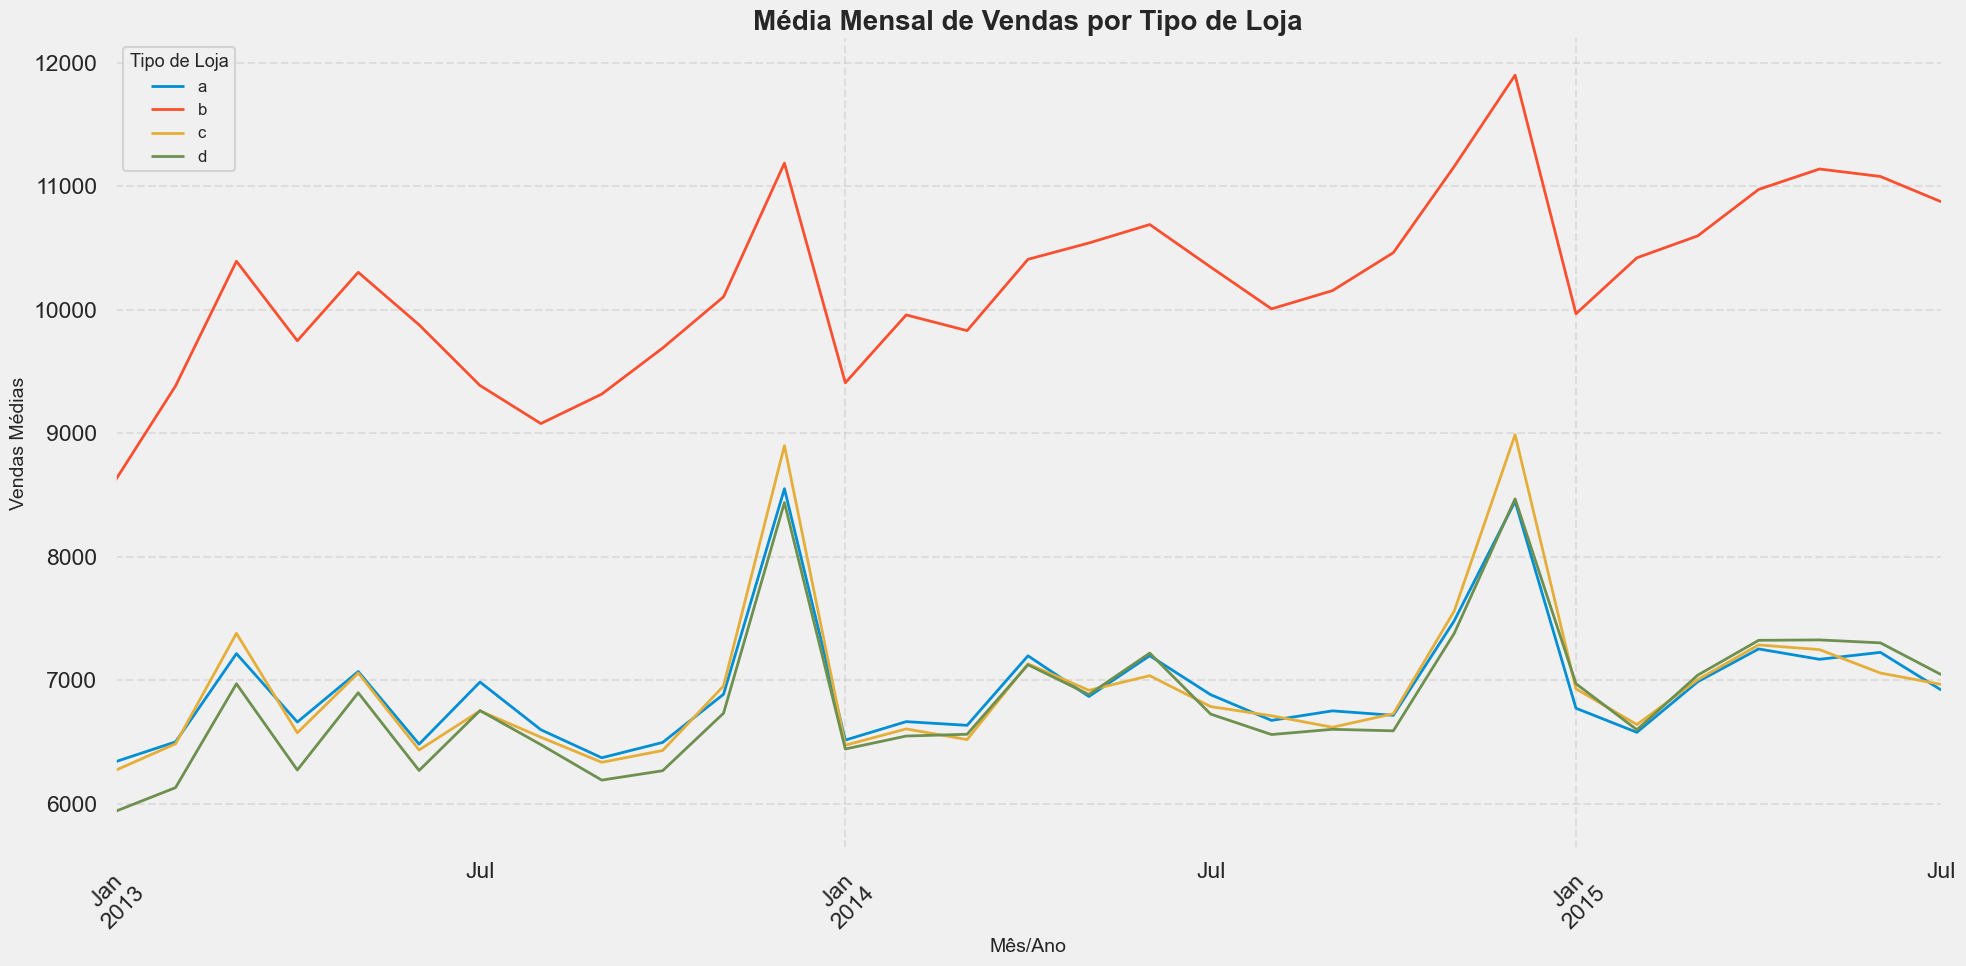

In [54]:
plt.style.use('fivethirtyeight')
sns.set_context('talk')  # Aumenta o tamanho dos elementos (ótimo para apresentações)

# Garantir que a coluna Date esteja no formato datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Criar coluna com o primeiro dia de cada mês (para agrupamento mensal)
df_completo['MesAno'] = df_completo['Date'].dt.to_period('M').dt.to_timestamp()

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(20, 10))

# Agrupar por mês e tipo de loja, calcular média de vendas e plotar
df_completo.groupby(['MesAno', 'StoreType'])['Sales'].mean().unstack().plot(ax=ax, linewidth=2)

# Título e rótulos dos eixos
ax.set_title('Média Mensal de Vendas por Tipo de Loja', fontsize=20, fontweight='bold')
ax.set_xlabel('Mês/Ano', fontsize=14)
ax.set_ylabel('Vendas Médias', fontsize=14)

# Personalizações visuais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
ax.tick_params(axis='x', rotation=45)

# Ajuste de layout
plt.tight_layout()
plt.show()

* **Observações Visuais**:
    * **Desempenho Distinto**: O `StoreType 'b'` consistentemente apresenta uma média mensal de vendas significativamente mais alta do que os outros tipos ('a', 'c', 'd').
    * **Agrupamento dos Demais Tipos**: Os `StoreType`s 'a', 'c', e 'd' têm médias de vendas muito similares entre si, formando um grupo com desempenho consideravelmente inferior ao tipo 'b'. Suas linhas no gráfico estão bem próximas e, por vezes, se sobrepõem.
    * **Sazonalidade Marcante**: Todos os tipos de loja exibem um forte padrão de sazonalidade mensal, com destaque para:
        * **Picos em Dezembro**: Um aumento expressivo nas vendas médias em Dezembro de cada ano, sendo este pico particularmente pronunciado para o `StoreType 'b'`.
        * **Vales em Janeiro/Fevereiro**: Quedas acentuadas nas vendas após o período festivo.
        * **Picos Secundários**: Observa-se um aumento nas vendas por volta de Março/Abril para todos os tipos, possivelmente relacionado à Páscoa ou ao início da primavera.
    * **Tendência Geral**: Para o `StoreType 'b'`, a tendência geral das vendas médias mensais parece relativamente estável ou com leve crescimento ao longo dos anos, com os picos e vales mantendo níveis similares. Os tipos 'a', 'c', e 'd' também parecem estáveis dentro da sua faixa de vendas mais baixa.
* **Interpretação**:
    * O `StoreType 'b'` é claramente o formato de loja com maior volume de vendas médias.
    * A sazonalidade de vendas é um fator importante para todos os tipos de loja, com o final do ano sendo crucial. O impacto dessa sazonalidade (em termos absolutos de vendas) é maior para o `StoreType 'b'`.
    * Os tipos 'a', 'c', e 'd' operam em um patamar de vendas médias muito parecido, sugerindo que podem ter características de mercado ou base de clientes semelhantes entre si, mas distintas do tipo 'b'.

---

### 2. Média semanal de vendas por Tipo de Loja (Por semana)

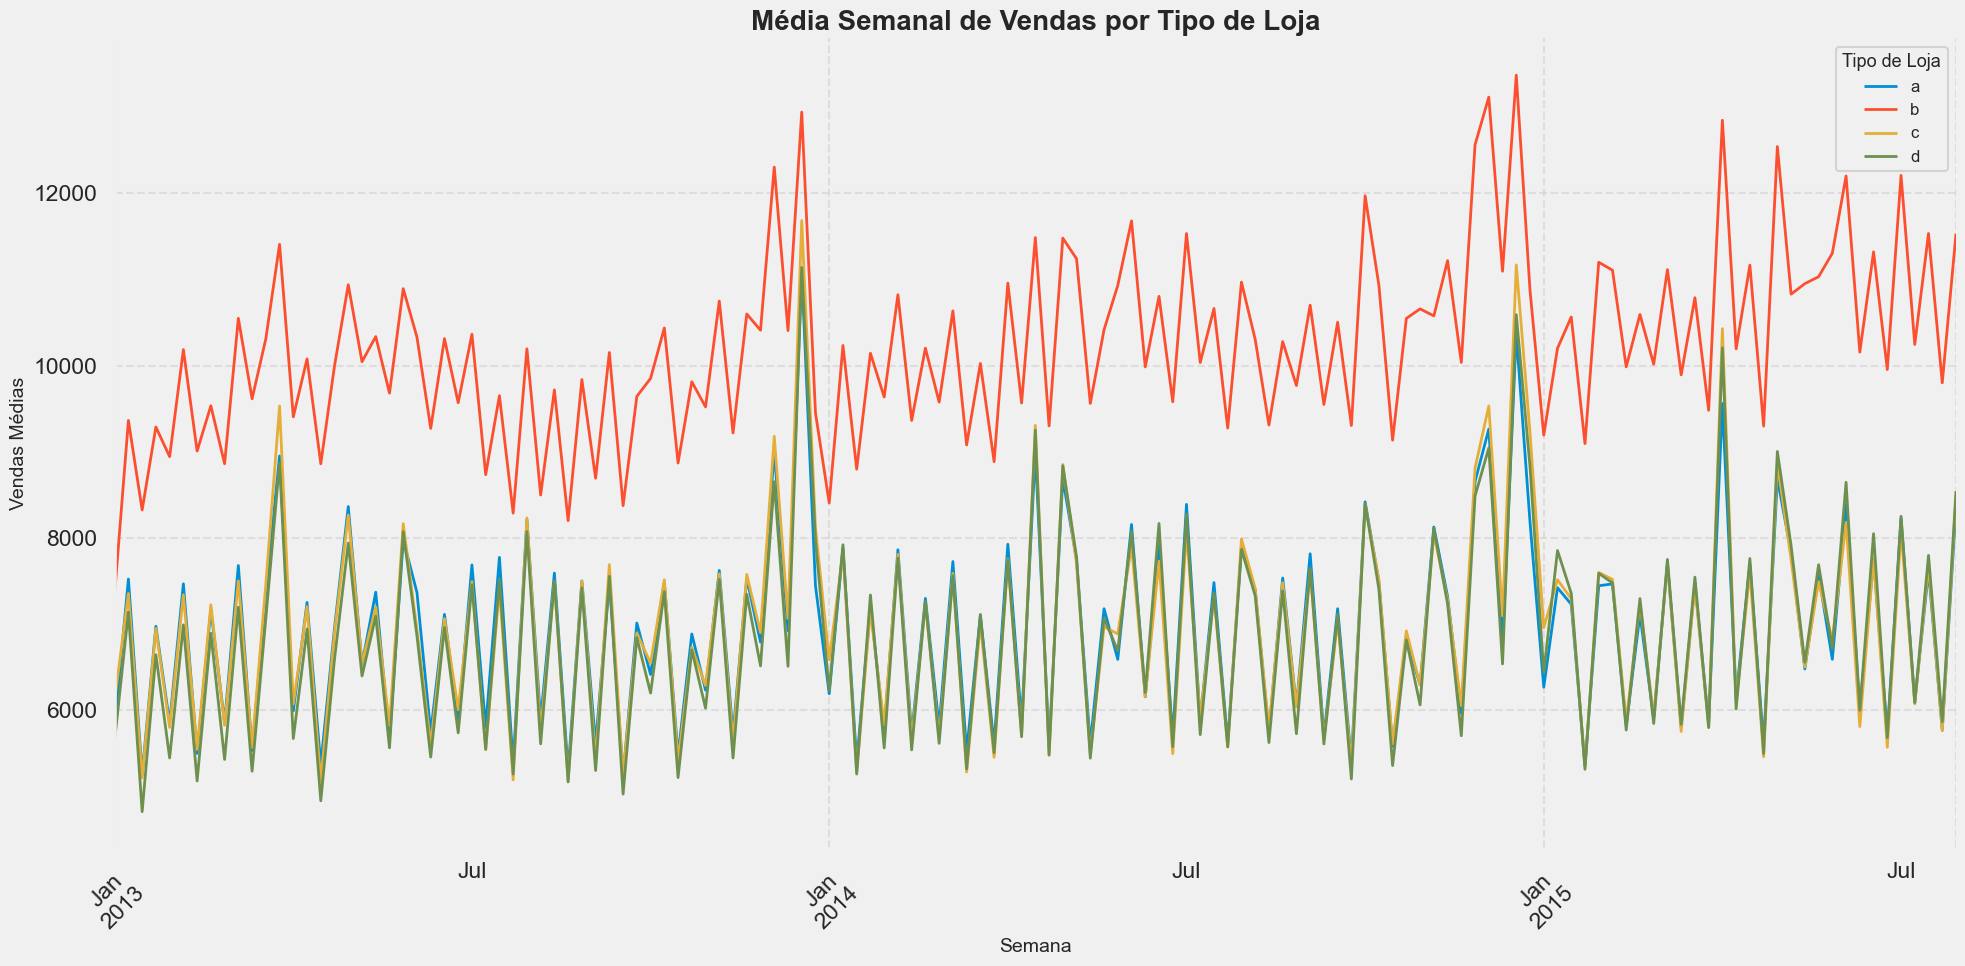

In [55]:
plt.style.use('fivethirtyeight')
sns.set_context('talk')  # Aumenta o tamanho dos elementos (ótimo para apresentações)

# Garantir que a coluna Date esteja no formato datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Definir a coluna Date como índice temporário para resample
df_temp = df_completo.set_index('Date')

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(20, 10))

# Agrupar por semana (resample) e tipo de loja, calcular média e plotar
(df_temp.groupby('StoreType')['Sales']
       .resample('W')  # 'W' = Weekly
       .mean()
       .unstack(level=0)
       .plot(ax=ax, linewidth=2))

# Título e rótulos dos eixos
ax.set_title('Média Semanal de Vendas por Tipo de Loja', fontsize=20, fontweight='bold')
ax.set_xlabel('Semana', fontsize=14)
ax.set_ylabel('Vendas Médias', fontsize=14)

# Personalizações visuais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
ax.tick_params(axis='x', rotation=45)

# Ajuste de layout
plt.tight_layout()
plt.show()

* **Observações Visuais**:
    * **Consistência com o Mensal**: Assim como no gráfico mensal, o `StoreType 'b'` se destaca com vendas médias semanais muito superiores. Os `StoreType`s 'a', 'c', e 'd' permanecem agrupados em um nível inferior.
    * **Maior Volatilidade**: A granularidade semanal revela mais flutuações de curto prazo (ruído) em comparação com a média mensal. As linhas são mais "denteadas".
    * **Padrões Sazonais Visíveis**: Apesar do ruído, os grandes padrões sazonais, como os picos acentuados próximos ao Natal e as quedas no início do ano, ainda são claramente identificáveis para todos os tipos de loja.
    * **Dificuldade de Distinção**: Para os `StoreType`s 'a', 'c', e 'd', a proximidade e sobreposição das linhas tornam difícil distinguir padrões semanais individuais sutis entre eles diretamente neste gráfico combinado.
* **Interpretação**:
    * A visualização semanal confirma a dominância do `StoreType 'b'` e a similaridade de desempenho entre os outros tipos.
    * Embora mais volátil, a análise semanal ainda suporta a forte influência da sazonalidade. Ela pode ser útil para identificar variações de mais curto prazo que seriam mascaradas pela média mensal.

---

### 3. Média diária de vendas por tipo de loja (Dia a Dia)

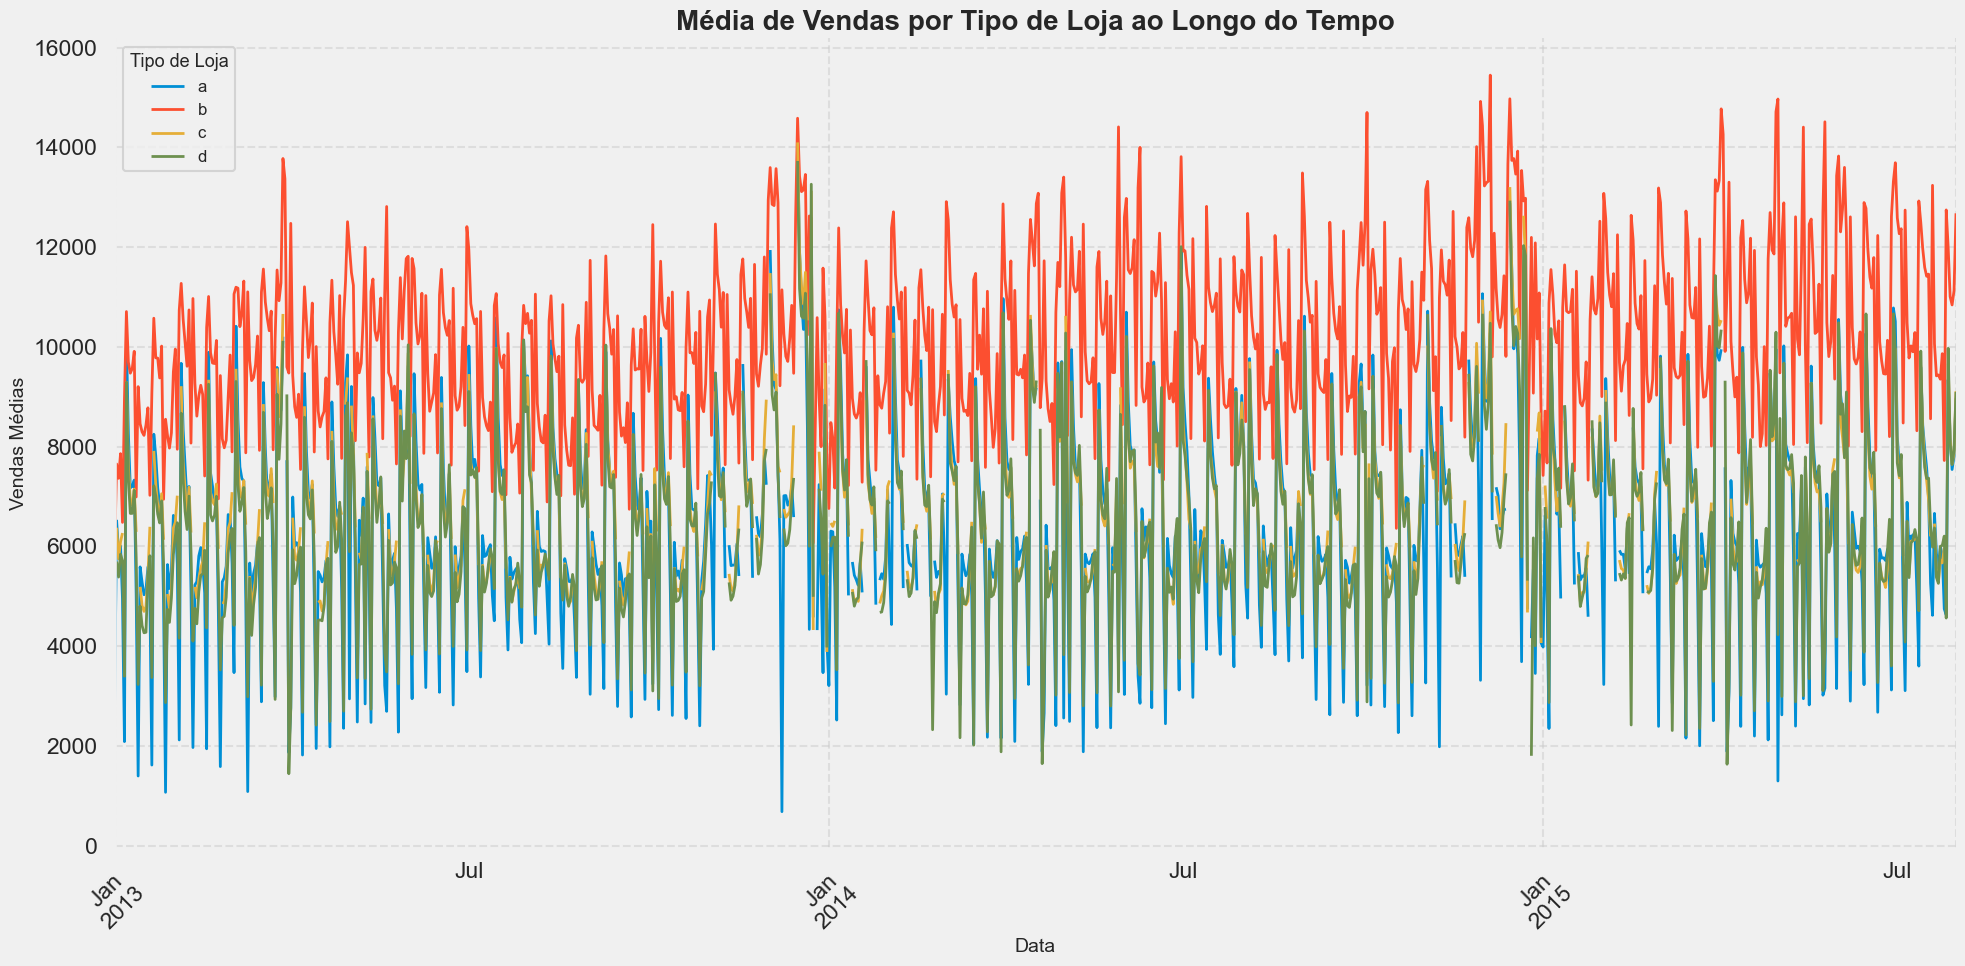

In [56]:
plt.style.use('fivethirtyeight')
sns.set_context('talk')  # Aumenta o tamanho dos elementos (ótimo para apresentações)

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(20, 10))

# Agrupar e plotar
df_completo.groupby(['Date', 'StoreType'])['Sales'].mean().unstack().plot(ax=ax, linewidth=2)

# Título e rótulos dos eixos
ax.set_title('Média de Vendas por Tipo de Loja ao Longo do Tempo', fontsize=20, fontweight='bold')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Vendas Médias', fontsize=14)

# Personalizações visuais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
ax.tick_params(axis='x', rotation=45)

# Ajuste de layout
plt.tight_layout()
plt.show()


* **Observações Visuais**:
    * **Ruído Elevado**: Este gráfico, com granularidade diária, é o mais ruidoso dos três. As flutuações diárias são muito pronunciadas para todos os tipos de loja.
    * **Dominância do `StoreType 'b'` Mantida**: Mesmo com o ruído, a linha do `StoreType 'b'` permanece consistentemente acima das demais, indicando vendas médias diárias superiores. As flutuações absolutas para o tipo 'b' também são maiores.
    * **Dificuldade de Análise Individual para 'a', 'c', 'd'**: As linhas para os `StoreType`s 'a', 'c', e 'd' estão muito entrelaçadas e com alto ruído, tornando quase impossível discernir tendências ou padrões individuais diários de forma clara neste gráfico combinado.
    * **Picos Sazonais Macro Visíveis**: Os períodos de vendas mais altas (como Dezembro) e mais baixas (Janeiro/Fevereiro) ainda são perceptíveis como "bandas" de maior ou menor densidade de picos e vales diários, especialmente para o `StoreType 'b'`.
* **Interpretação**:
    * A análise diária confirma a performance superior do `StoreType 'b'`.
    * O alto nível de ruído neste gráfico destaca a utilidade das agregações mensais e semanais para identificar tendências e padrões sazonais mais claros, especialmente ao comparar múltiplos grupos (como os `StoreType`s) em um único visual.
    * Para uma análise diária mais aprofundada de cada `StoreType` (especialmente 'a', 'c', 'd'), poderia ser necessário plotá-los individualmente ou usar técnicas de suavização.

---

#### Suavização (Gemini)

Dummy df_completo_daily_sales created with columns: Date, StoreType, Sales.
        Date StoreType         Sales
0 2013-01-01         a   4371.803856
1 2013-01-01         b  14593.645399
2 2013-01-01         c   5696.693593
3 2013-01-01         d   8252.275204
4 2013-01-02         a   4545.741640
Shape of dummy data: (3768, 3)
Calculating daily average sales per StoreType...
Daily average sales by StoreType (head):
StoreType             a             b            c            d
Date                                                           
2013-01-01  4371.803856  14593.645399  5696.693593  8252.275204
2013-01-02  4545.741640  10195.668173  3971.645165  6404.743313
2013-01-03  4356.192558  10139.601201  6104.995258  8032.429587
2013-01-04  1639.946130  12953.214293  4451.114423  7648.060227
2013-01-05  5216.205376  12502.016802  5940.903777  3991.516679
Applying 7-day rolling mean...
Smoothed (7D) daily average sales by StoreType (head):
StoreType             a             b          

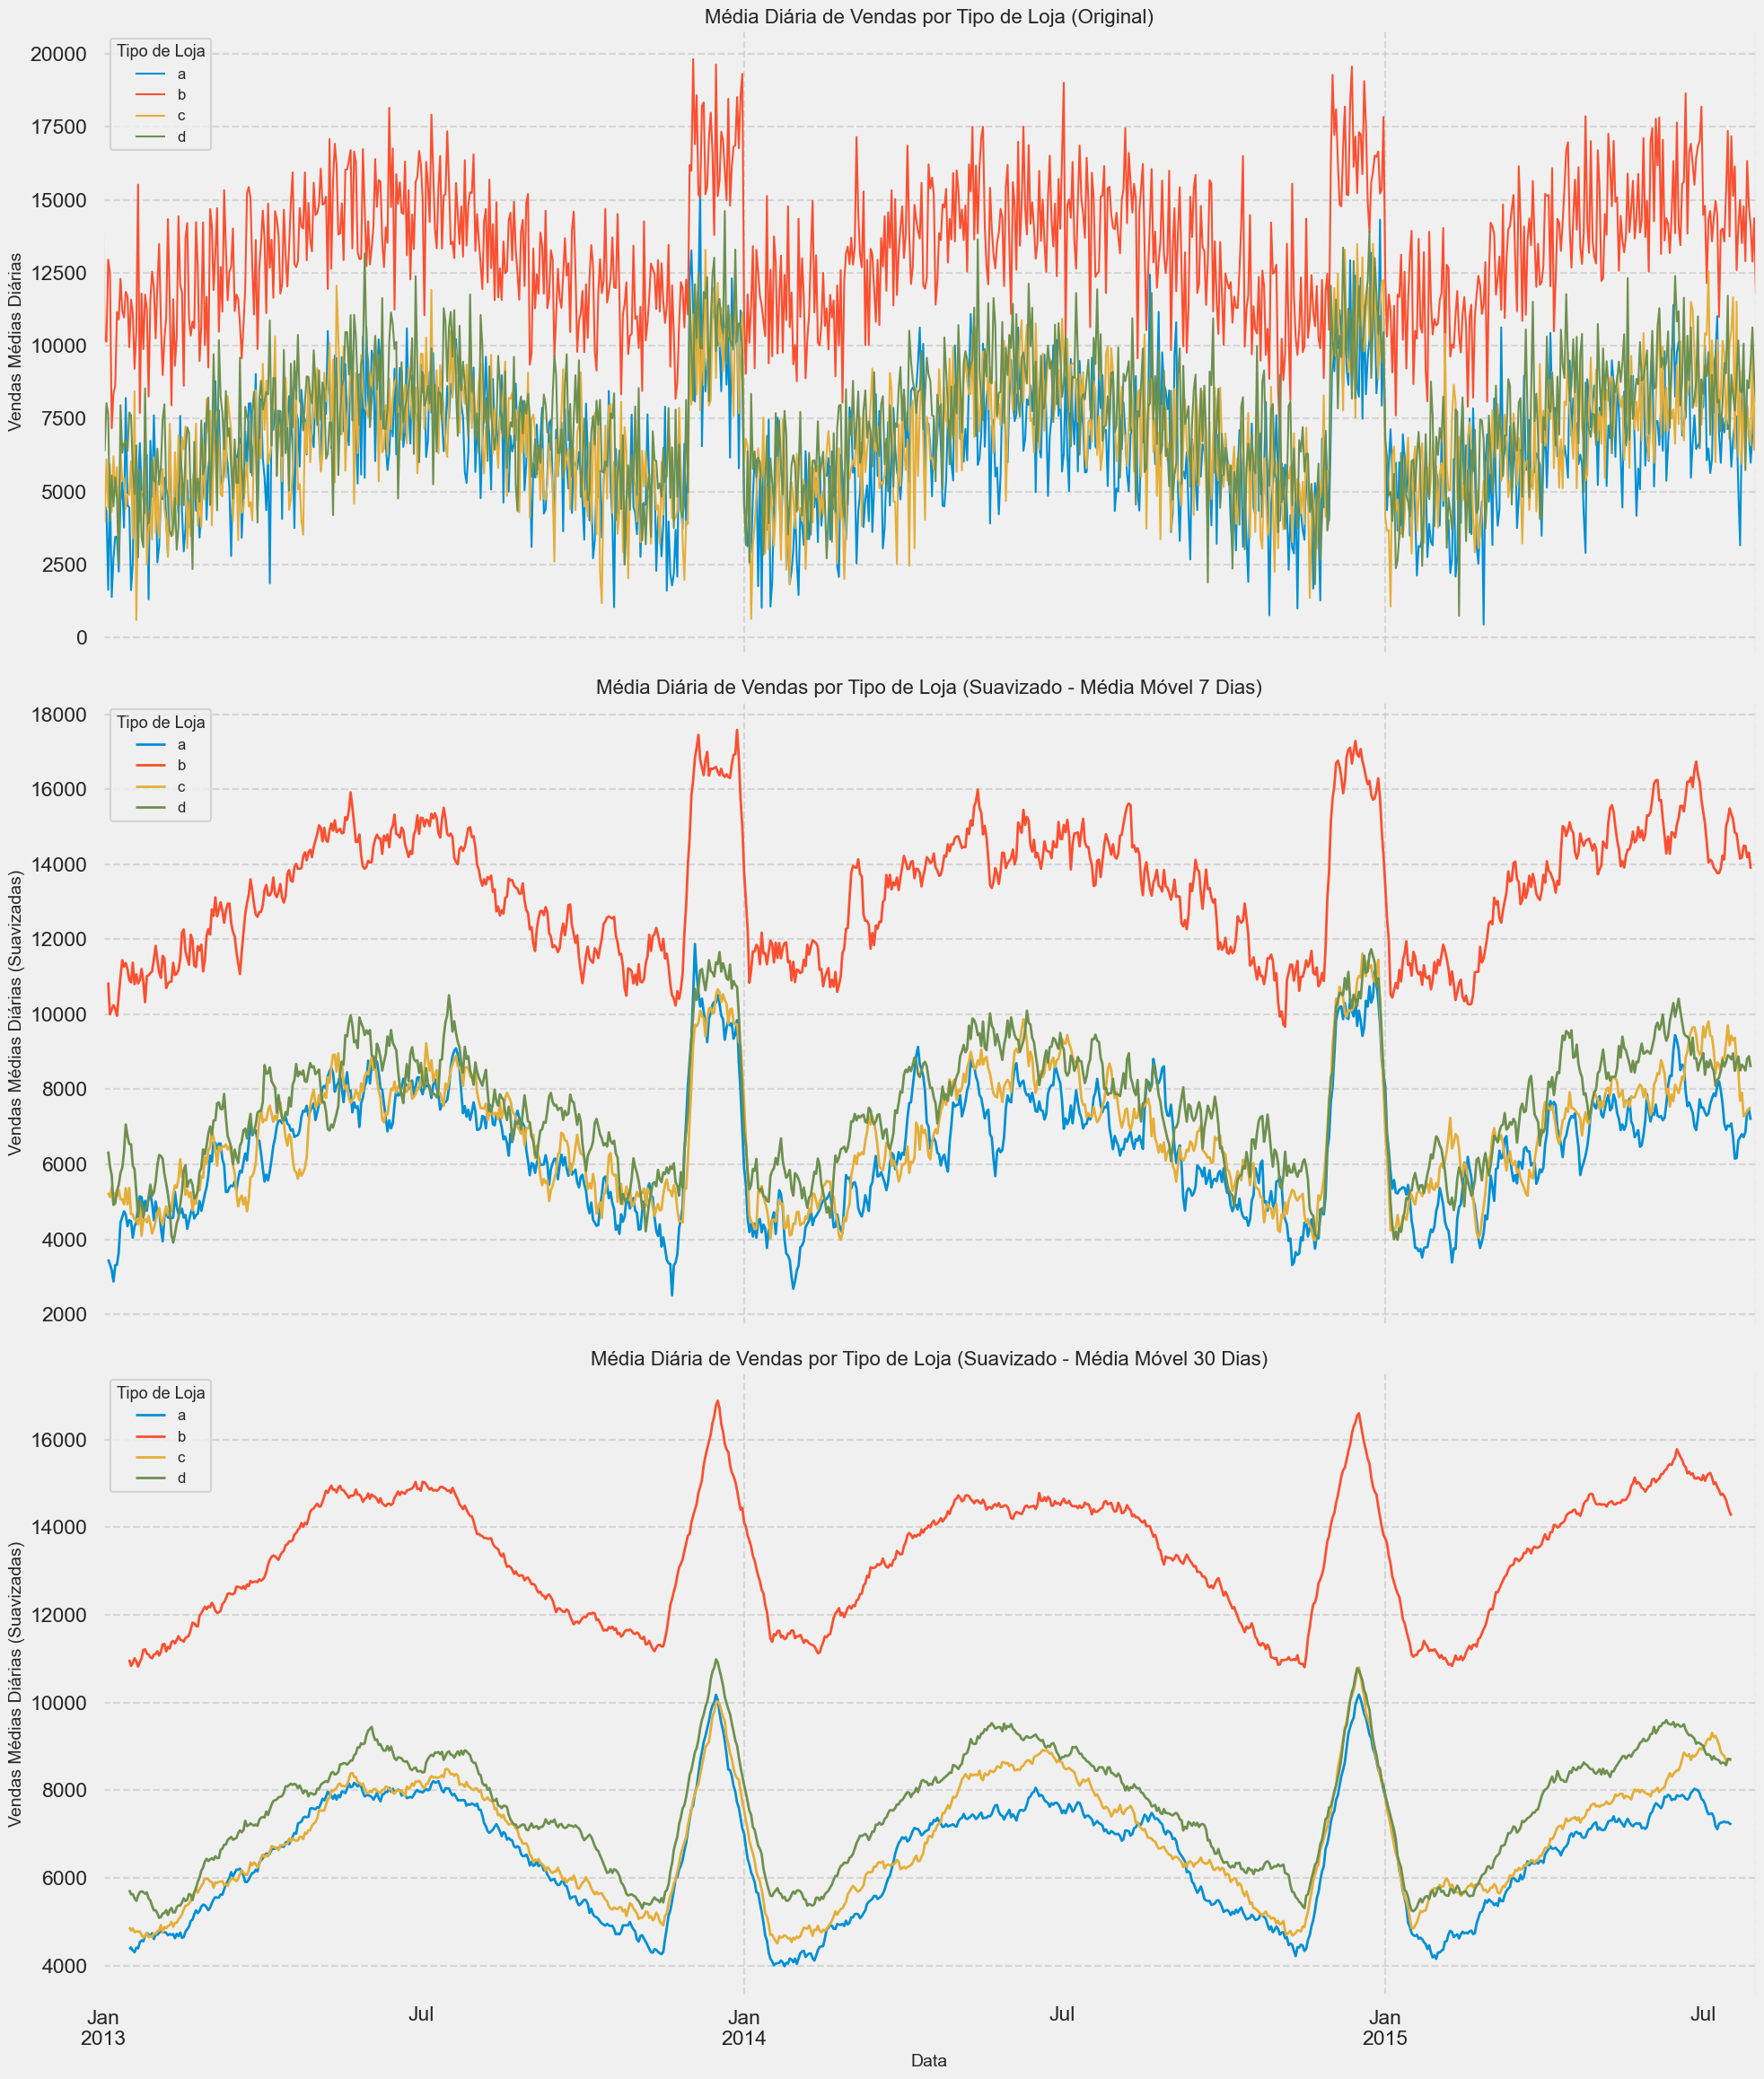

In [57]:
date_rng = pd.date_range(start='2013-01-01', end='2015-07-31', freq='D')
store_types = ['a', 'b', 'c', 'd']
num_stores_per_type = {'a': 50, 'b': 10, 'c': 30, 'd': 20} # Arbitrary numbers
all_stores = []
for stype, count in num_stores_per_type.items():
    for i in range(count):
        all_stores.append(f"{stype}_store_{i+1}")


# Generate sample data for df_completo
data = []
for date in date_rng:
    for stype in store_types:
        # Simulate sales with seasonality and noise
        base_sales = {'a': 6000, 'b': 10000, 'c': 6500, 'd': 7000}
        month_effect = np.sin(date.month * 2 * np.pi / 12 - np.pi / 2) * 2000  # Simple seasonality
        if date.month == 12: # December peak
            month_effect = 4000
        if date.month in [1,2]: # Jan/Feb dip
            month_effect = -1500
        noise = np.random.normal(0, 1500)
        sales = base_sales[stype] + month_effect + noise
        if stype == 'b': # Make store type b consistently higher
            sales += 3000 + np.random.normal(0,500) # Add more for type b
        sales = max(0, sales) # Sales can't be negative
        data.append([date, stype, sales])

df_completo_daily_sales = pd.DataFrame(data, columns=['Date', 'StoreType', 'Sales'])
df_completo_daily_sales['Date'] = pd.to_datetime(df_completo_daily_sales['Date'])

print("Dummy df_completo_daily_sales created with columns: Date, StoreType, Sales.")
print(df_completo_daily_sales.head())
print(f"Shape of dummy data: {df_completo_daily_sales.shape}")


# Calculate daily average sales per store type
print("Calculating daily average sales per StoreType...")
daily_sales_by_type = df_completo_daily_sales.groupby(['Date', 'StoreType'])['Sales'].mean().unstack(level='StoreType')
print("Daily average sales by StoreType (head):")
print(daily_sales_by_type.head())

# Apply rolling mean to smooth the data
# Let's use a 7-day and a 30-day rolling window for comparison
print("Applying 7-day rolling mean...")
smoothed_sales_7d = daily_sales_by_type.rolling(window=7, center=True).mean()
print("Smoothed (7D) daily average sales by StoreType (head):")
print(smoothed_sales_7d.head())

print("Applying 30-day rolling mean...")
smoothed_sales_30d = daily_sales_by_type.rolling(window=30, center=True).mean()
print("Smoothed (30D) daily average sales by StoreType (head):")
print(smoothed_sales_30d.head())


# Plotting
print("Generating plots...")
plt.style.use('fivethirtyeight')
sns.set_context('talk')

fig, axes = plt.subplots(3, 1, figsize=(20, 25), sharex=True) # Adjusted to 3 rows, 1 col

# 1. Original (Noisy) Plot
daily_sales_by_type.plot(ax=axes[0], linewidth=1.5)
axes[0].set_title('Média Diária de Vendas por Tipo de Loja (Original)', fontsize=16)
axes[0].set_xlabel('Data', fontsize=14)
axes[0].set_ylabel('Vendas Médias Diárias', fontsize=14)
axes[0].legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
axes[0].grid(True, linestyle='--', alpha=0.7)

# 2. Smoothed Plot (7-day rolling mean)
smoothed_sales_7d.plot(ax=axes[1], linewidth=2)
axes[1].set_title('Média Diária de Vendas por Tipo de Loja (Suavizado - Média Móvel 7 Dias)', fontsize=16)
axes[1].set_xlabel('Data', fontsize=14)
axes[1].set_ylabel('Vendas Médias Diárias (Suavizadas)', fontsize=14)
axes[1].legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
axes[1].grid(True, linestyle='--', alpha=0.7)

# 3. Smoothed Plot (30-day rolling mean)
smoothed_sales_30d.plot(ax=axes[2], linewidth=2)
axes[2].set_title('Média Diária de Vendas por Tipo de Loja (Suavizado - Média Móvel 30 Dias)', fontsize=16)
axes[2].set_xlabel('Data', fontsize=14)
axes[2].set_ylabel('Vendas Médias Diárias (Suavizadas)', fontsize=14)
axes[2].legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout to prevent title overlap
smoothed_plot_path = "smoothed_daily_sales_by_storetype.png"
plt.show() # Comment out for non-interactive environments

### **Conclusões Gerais da Análise Agrupada por `StoreType`:**

* O `StoreType 'b'` é consistentemente o tipo de loja com maior volume de vendas médias, seja na análise diária, semanal ou mensal.
* Os `StoreType`s 'a', 'c', e 'd' têm um desempenho de vendas médias muito similar entre si, operando em um patamar significativamente inferior ao tipo 'b'.
* Todos os tipos de loja são afetados por padrões sazonais, com destaque para o aumento expressivo de vendas no final do ano.
* A agregação dos dados (mensal ou semanal) é muito útil para suavizar o ruído diário e permitir uma melhor visualização e comparação das tendências e da sazonalidade entre os diferentes tipos de loja.

## Análise da Influência da Promoção (`Promo`) nas Vendas (`Sales`)

Um dos objetivos importantes na análise de dados de vendas é entender o impacto das promoções. Nesta seção, vamos investigar se os dias em que uma promoção estava ativa (`Promo == 1`) resultaram em um volume de vendas diferente dos dias sem promoção (`Promo == 0`).

Para isso, vamos:
1.  Calcular e comparar as principais estatísticas descritivas das vendas para cada um desses dois grupos (com e sem promoção).
2.  Visualizar essas diferenças usando boxplots e gráficos de barras para facilitar a interpretação.

Isso nos ajudará a quantificar e visualizar o possível "lift" (aumento) nas vendas proporcionado pelas promoções.

Estatísticas Descritivas de Vendas (Sales) agrupadas por Promoção (Promo):

          count         mean          std  min     25%     50%     75%  \
Promo                                                                    
0      467496.0  5929.407603  2629.648385  0.0  4242.0  5459.0  7004.0   
1      376896.0  8228.281239  3175.759157  0.0  6069.0  7649.0  9686.0   

           max  
Promo           
0      41551.0  
1      38722.0  
--------------------------------------------------

Média de Vendas sem Promoção (Promo=0): 5,929.41
Média de Vendas com Promoção (Promo=1): 8,228.28
Aumento percentual médio nas vendas com promoção: 38.77%
--------------------------------------------------


/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_64171/37367482.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Sales', data=df_completo, palette=['lightcoral', 'skyblue'], ax=axes[0])



Código para gráficos comparativos de Promo vs Sales em subplots gerado.


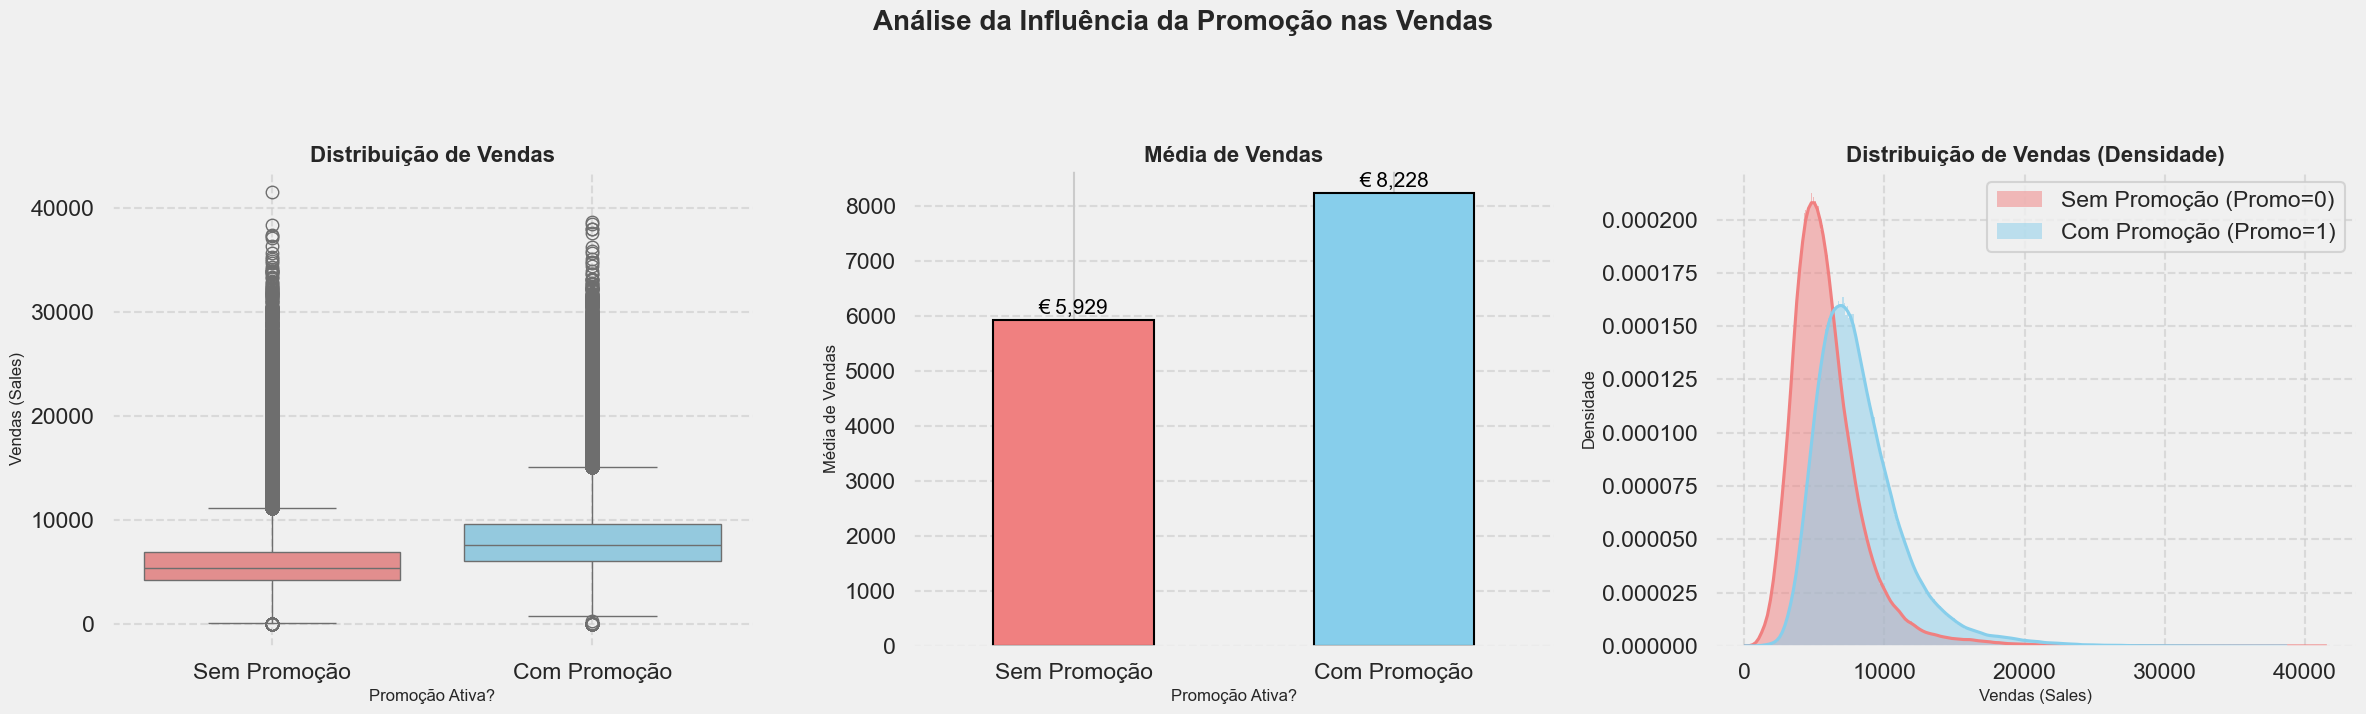

In [58]:
# 1. Comparando Estatísticas Descritivas (esta parte permanece a mesma, apenas para output textual)
print("Estatísticas Descritivas de Vendas (Sales) agrupadas por Promoção (Promo):\n")
desc_sales_promo = df_completo.groupby('Promo')['Sales'].describe()
print(desc_sales_promo)
print("-" * 50)

# Calcular a diferença percentual na média de vendas
if 0 in desc_sales_promo.index and 1 in desc_sales_promo.index:
    mean_sales_no_promo = desc_sales_promo.loc[0, 'mean']
    mean_sales_with_promo = desc_sales_promo.loc[1, 'mean']

    if mean_sales_no_promo > 0: # Evitar divisão por zero
        lift_percentual = ((mean_sales_with_promo - mean_sales_no_promo) / mean_sales_no_promo) * 100
        print(f"\nMédia de Vendas sem Promoção (Promo=0): {mean_sales_no_promo:,.2f}")
        print(f"Média de Vendas com Promoção (Promo=1): {mean_sales_with_promo:,.2f}")
        print(f"Aumento percentual médio nas vendas com promoção: {lift_percentual:.2f}%")
    else:
        print("\nMédia de vendas sem promoção é zero, não é possível calcular o lift percentual diretamente.")
else:
    print("\nNão foi possível encontrar dados para Promo=0 e Promo=1 para calcular o lift.")

print("-" * 50)


# 2. Visualizações Consolidadas em Subplots

# Estilo dos gráficos
plt.style.use('fivethirtyeight')
sns.set_context('talk')

# Criar uma figura com 3 subplots lado a lado
# Ajuste o figsize para uma boa visualização (largura, altura)
fig, axes = plt.subplots(1, 3, figsize=(24, 7)) # 1 linha, 3 colunas

fig.suptitle('Análise da Influência da Promoção nas Vendas', fontsize=20, fontweight='bold', y=1.03)

# a) Boxplot de Vendas por Promoção (no primeiro subplot: axes[0])
sns.boxplot(x='Promo', y='Sales', data=df_completo, palette=['lightcoral', 'skyblue'], ax=axes[0])
axes[0].set_title('Distribuição de Vendas', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Promoção Ativa?', fontsize=12)
axes[0].set_ylabel('Vendas (Sales)', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Sem Promoção', 'Com Promoção'])
axes[0].grid(True, linestyle='--', alpha=0.6)

# b) Gráfico de Barras da Média de Vendas por Promoção (no segundo subplot: axes[1])
mean_sales_by_promo_plot_data = df_completo.groupby('Promo')['Sales'].mean()
bars = mean_sales_by_promo_plot_data.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black', ax=axes[1])
axes[1].set_title('Média de Vendas', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Promoção Ativa?', fontsize=12)
axes[1].set_ylabel('Média de Vendas', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Sem Promoção', 'Com Promoção'], rotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar valores nas barras
for bar in bars.patches:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval + 50, f'€ {yval:,.0f}',
                 ha='center', va='bottom', fontsize=15, color='black')

# c) Histogramas/Density Plots (no terceiro subplot: axes[2])
sns.histplot(df_completo[df_completo['Promo'] == 0]['Sales'], color="lightcoral", label='Sem Promoção (Promo=0)', kde=True, stat="density", linewidth=0, ax=axes[2])
sns.histplot(df_completo[df_completo['Promo'] == 1]['Sales'], color="skyblue", label='Com Promoção (Promo=1)', kde=True, stat="density", linewidth=0, ax=axes[2])
axes[2].set_title('Distribuição de Vendas (Densidade)', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Vendas (Sales)', fontsize=12)
axes[2].set_ylabel('Densidade', fontsize=12)
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.6)
# Pode ser útil limitar o eixo X se houver outliers extremos
# axes[2].set_xlim(0, df_completo['Sales'].quantile(0.95))

# Ajustar layout para evitar sobreposição e dar espaço para o suptitle
plt.tight_layout(rect=[0, 0, 1, 0.95])

# plt.show()
# fig.savefig('comparativo_promo_sales_subplots.png', dpi=300)

print("\nCódigo para gráficos comparativos de Promo vs Sales em subplots gerado.")

As estatísticas descritivas principais mostram:
* **Sem Promoção (Promo = 0)**:
    * Contagem de dias: 467.496
    * Média de Vendas: € 5.929,41
    * Mediana de Vendas (50%): € 5.459,00
    * Desvio Padrão: € 2.629,65
* **Com Promoção (Promo = 1)**:
    * Contagem de dias: 376.896
    * Média de Vendas: € 8.228,28
    * Mediana de Vendas (50%): € 7.649,00
    * Desvio Padrão: € 3.175,76

Isso resulta em um **aumento percentual médio nas vendas com promoção de 38.77%**. Este é um "lift" bastante significativo.

### 1. Boxplot: Distribuição de Vendas com e sem Promoção

* **Observação Visual**: O gráfico de boxplot mostra duas distribuições lado a lado para as vendas, uma para "Sem Promoção" (Promo=0) e outra para "Com Promoção" (Promo=1).
    * **Mediana (Linha central da caixa)**: A mediana das vendas para os dias "Com Promoção" é visivelmente mais alta do que a mediana para os dias "Sem Promoção". A linha central da caixa azul (Com Promoção) está posicionada em um nível de vendas superior ao da caixa vermelha (Sem Promoção).
    * **Intervalo Interquartil (IQR - Altura da caixa)**: A caixa azul (`Promo == 1`) parece ser um pouco mais "alta" (maior IQR) e está totalmente deslocada para cima em relação à caixa vermelha (`Promo == 0`). Isso indica que o intervalo central de 50% das vendas é maior e ocorre em valores de vendas mais elevados quando há promoção.
    * **Whiskers (Hastes) e Outliers**: Ambas as distribuições possuem outliers (pontos individuais acima das hastes), indicando dias com vendas excepcionalmente altas. A dispersão geral das vendas (incluindo os whiskers) parece ser maior nos dias com promoção.
* **Interpretação**:
    * O boxplot confirma visualmente que as vendas tendem a ser significativamente mais altas nos dias com promoção. Não apenas a mediana é maior, mas toda a "caixa" (representando 50% dos dados centrais) está deslocada para valores de vendas superiores.
    * A maior dispersão (IQR e possivelmente whiskers mais longos) nos dias com promoção pode indicar que, embora as vendas sejam geralmente mais altas, elas também podem ser um pouco mais variáveis.

---

### 2. Gráfico de Barras: Média de Vendas com e sem Promoção

* **Observação Visual**: Este gráfico apresenta duas barras, comparando diretamente a média de vendas.
    * A barra azul ("Com Promoção", `Promo == 1`) é substancialmente mais alta (€ 8.228) do que a barra vermelha ("Sem Promoção", `Promo == 0`, € 5.929).
* **Interpretação**:
    * Este gráfico oferece a comparação mais direta e clara do impacto médio das promoções. Ele quantifica visualmente o aumento médio de aproximadamente € 2.299 nas vendas diárias quando uma promoção está ativa.
    * Reforça a conclusão de que as promoções têm um efeito positivo e considerável na média de vendas.

---

### 3. Gráfico de Densidade/Histograma: Distribuição de Vendas com e sem Promoção (Densidade)

* **Observação Visual**: Este gráfico sobrepõe as curvas de densidade (aproximações suavizadas dos histogramas) das vendas para os dois grupos.
    * **Deslocamento da Distribuição**: A curva de densidade azul (`Promo == 1`) está visivelmente deslocada para a direita em relação à curva vermelha (`Promo == 0`).
    * **Picos**: O pico da distribuição azul ocorre em um valor de vendas mais alto do que o pico da distribuição vermelha.
    * **Forma e Dispersão**: Ambas as distribuições são assimétricas à direita (com uma cauda longa para vendas mais altas). A curva azul (`Promo == 1`) parece ser um pouco mais achatada e espalhada, especialmente na sua cauda direita, o que é consistente com o maior desvio padrão observado nas estatísticas (€ 3.175,76 com promo vs. € 2.629,65 sem promo).
* **Interpretação**:
    * O deslocamento para a direita da distribuição "Com Promoção" indica que, de modo geral, os valores de vendas são mais altos quando há promoções.
    * O fato de a curva ser um pouco mais achatada e espalhada para `Promo == 1` sugere que, além de aumentar as vendas, as promoções também podem levar a uma maior variabilidade nos valores de vendas diárias (alguns dias promocionais podem ter vendas excepcionalmente altas, enquanto outros podem ter um aumento mais modesto).

---

### **Conclusões Gerais da Análise de Influência da `Promo`:**

Com base nas estatísticas descritivas e nas três visualizações, é evidente que a presença de uma **promoção (`Promo == 1`) tem uma influência positiva e substancial nas vendas**.
* A média de vendas é aproximadamente **38.77% maior** nos dias com promoção.
* A mediana das vendas também é significativamente maior.
* Toda a distribuição de vendas é deslocada para valores mais altos durante os dias promocionais.
* Há um indicativo de que as vendas em dias promocionais também podem apresentar uma variabilidade um pouco maior.

Esta análise confirma a eficácia das promoções diárias em impulsionar o volume de vendas.

## Impacto das promoções nas vendas por tipo de loja

                    count          mean          std  min     25%      50%  \
StoreType Promo                                                              
a         0      252556.0   5808.500091  2721.198182  0.0  4022.0   5313.0   
          1      204521.0   8304.102317  3380.210549  0.0  5969.0   7646.0   
b         0        9623.0   9566.861686  4915.918149  0.0  5939.5   8516.0   
          1        5940.0  11307.994108  5353.859389  0.0  7140.5  10202.5   
c         0       62240.0   6028.063255  2544.560547  0.0  4343.0   5523.0   
          1       50738.0   8041.995526  2918.592042  0.0  6049.0   7572.0   
d         0      143077.0   5855.268289  2038.728826  0.0  4494.0   5551.0   
          1      115697.0   8017.828656  2625.504423  0.0  6207.0   7626.0   

                     75%      max  
StoreType Promo                    
a         0       6946.0  41551.0  
          1       9852.0  38025.0  
b         0      12205.5  38367.0  
          1      14829.0  38722.0  
c  

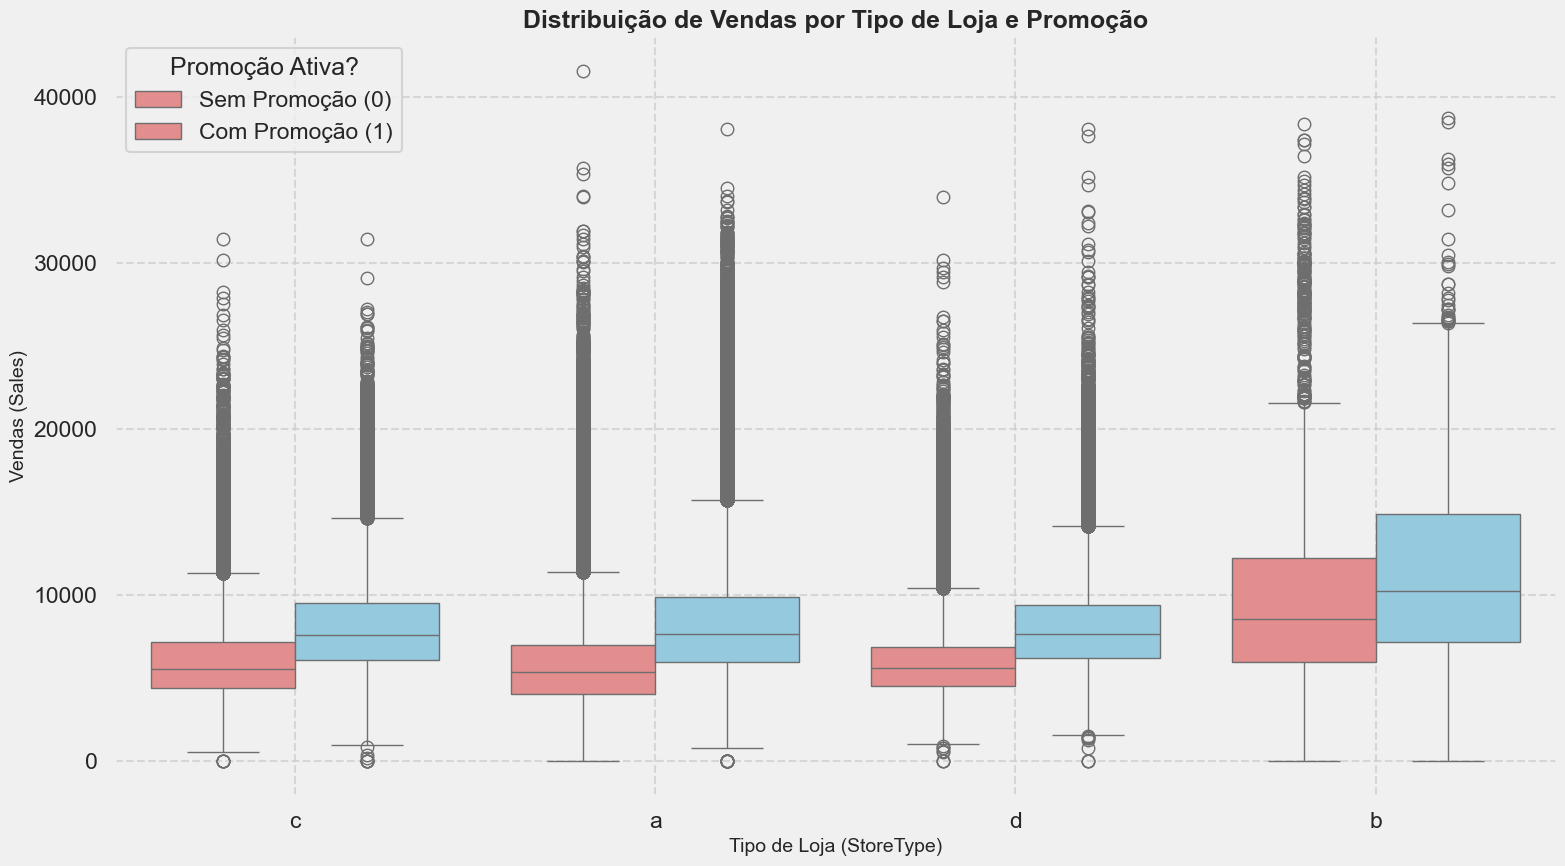

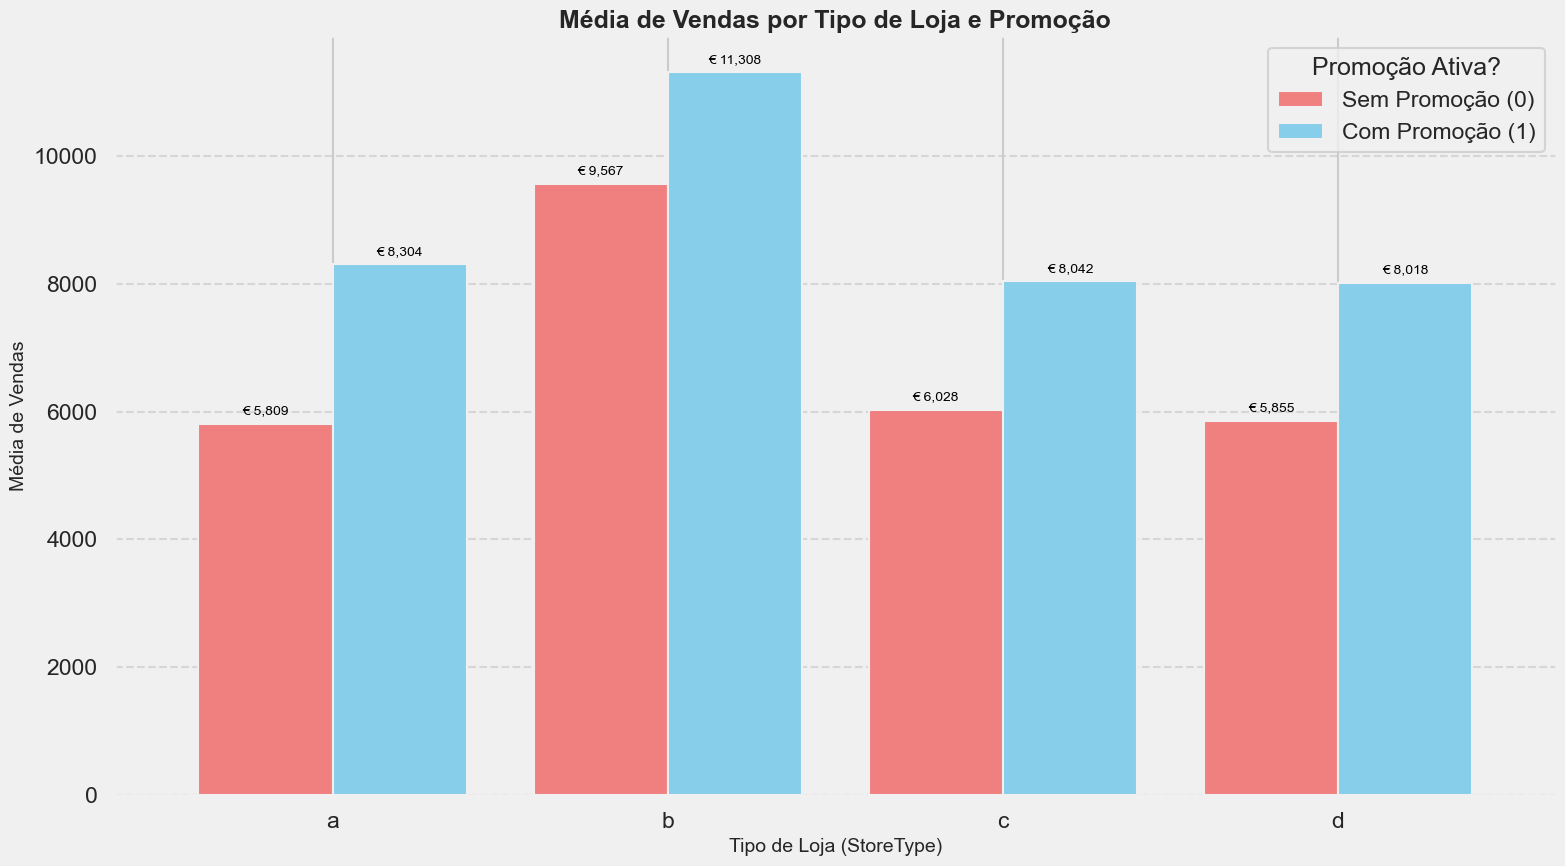

In [59]:
# Calcular estatísticas descritivas de Sales agrupadas por StoreType e Promo
desc_sales_promo_storetype = df_completo.groupby(['StoreType', 'Promo'])['Sales'].describe()
print(desc_sales_promo_storetype)

# Calcular o aumento percentual médio nas vendas com promoção para cada StoreType
print("\n--- Aumento Percentual Médio nas Vendas com Promoção por Tipo de Loja ---")
for store_type in df_completo['StoreType'].unique():
    if store_type in desc_sales_promo_storetype.index:
        try:
            mean_sales_no_promo = desc_sales_promo_storetype.loc[(store_type, 0), 'mean']
            mean_sales_with_promo = desc_sales_promo_storetype.loc[(store_type, 1), 'mean']

            if mean_sales_no_promo > 0:
                lift_percentual = ((mean_sales_with_promo - mean_sales_no_promo) / mean_sales_no_promo) * 100
                print(f"StoreType '{store_type}':")
                print(f"  Média de Vendas sem Promoção (Promo=0): € {mean_sales_no_promo:,.2f}")
                print(f"  Média de Vendas com Promoção (Promo=1): € {mean_sales_with_promo:,.2f}")
                print(f"  Aumento percentual médio: {lift_percentual:.2f}%")
            else:
                print(f"StoreType '{store_type}': Média de vendas sem promoção é zero, não é possível calcular o aumento.")
        except KeyError:
            print(f"StoreType '{store_type}': Não foi possível encontrar dados para Promo=0 e Promo=1 para calcular o aumento.")
    print("-" * 40)

plt.style.use('fivethirtyeight')
sns.set_context('talk')

plt.figure(figsize=(16, 9))
sns.boxplot(x='StoreType', y='Sales', hue='Promo', data=df_completo, palette=['lightcoral', 'skyblue'])
plt.title('Distribuição de Vendas por Tipo de Loja e Promoção', fontsize=18, fontweight='bold')
plt.xlabel('Tipo de Loja (StoreType)', fontsize=14)
plt.ylabel('Vendas (Sales)', fontsize=14)
plt.legend(title='Promoção Ativa?', labels=['Sem Promoção (0)', 'Com Promoção (1)'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular a média de vendas agrupada
mean_sales_promo_storetype = df_completo.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack()

# Aplicar estilo e contexto (já presente no seu código)
plt.style.use('fivethirtyeight')
sns.set_context('talk')

# Plotar o gráfico de barras
# A chamada .plot() retorna um objeto Axes, que vamos chamar de 'ax'
ax = mean_sales_promo_storetype.plot(kind='bar', figsize=(16, 9),
                                     color=['lightcoral', 'skyblue'],
                                     width=0.8) # A largura total para o grupo de barras

plt.title('Média de Vendas por Tipo de Loja e Promoção', fontsize=18, fontweight='bold')
plt.xlabel('Tipo de Loja (StoreType)', fontsize=14)
plt.ylabel('Média de Vendas', fontsize=14)
plt.xticks(rotation=0) # Mantém os rótulos do eixo x na horizontal
plt.legend(title='Promoção Ativa?', labels=['Sem Promoção (0)', 'Com Promoção (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grade apenas no eixo y para clareza

# Adicionar valores centralizados nas barras
# Iteramos sobre cada 'patch' (barra) no gráfico
for bar in ax.patches:
    # bar.get_height() é o valor da média (altura da barra)
    yval = bar.get_height()

    # bar.get_x() é a coordenada x da borda esquerda da barra
    # bar.get_width() é a largura da barra
    # A posição x centralizada para o texto é: borda_esquerda + metade_da_largura
    xval = bar.get_x() + bar.get_width() / 2

    # Formatar o rótulo do valor
    label = f'€ {yval:,.0f}' # Formata como moeda, sem casas decimais

    # Adicionar o texto no gráfico
    ax.text(xval,           # Posição x centralizada
            yval + 100,     # Posição y (um pouco acima da barra, ajuste o '100' se necessário)
            label,          # O texto do rótulo
            ha='center',    # Alinhamento horizontal centralizado
            va='bottom',    # Alinhamento vertical (base do texto na posição y)
            fontsize=10,    # Tamanho da fonte do rótulo
            color='black')  # Cor do rótulo

plt.tight_layout() # Ajusta o layout para evitar que os elementos se sobreponham
plt.show()

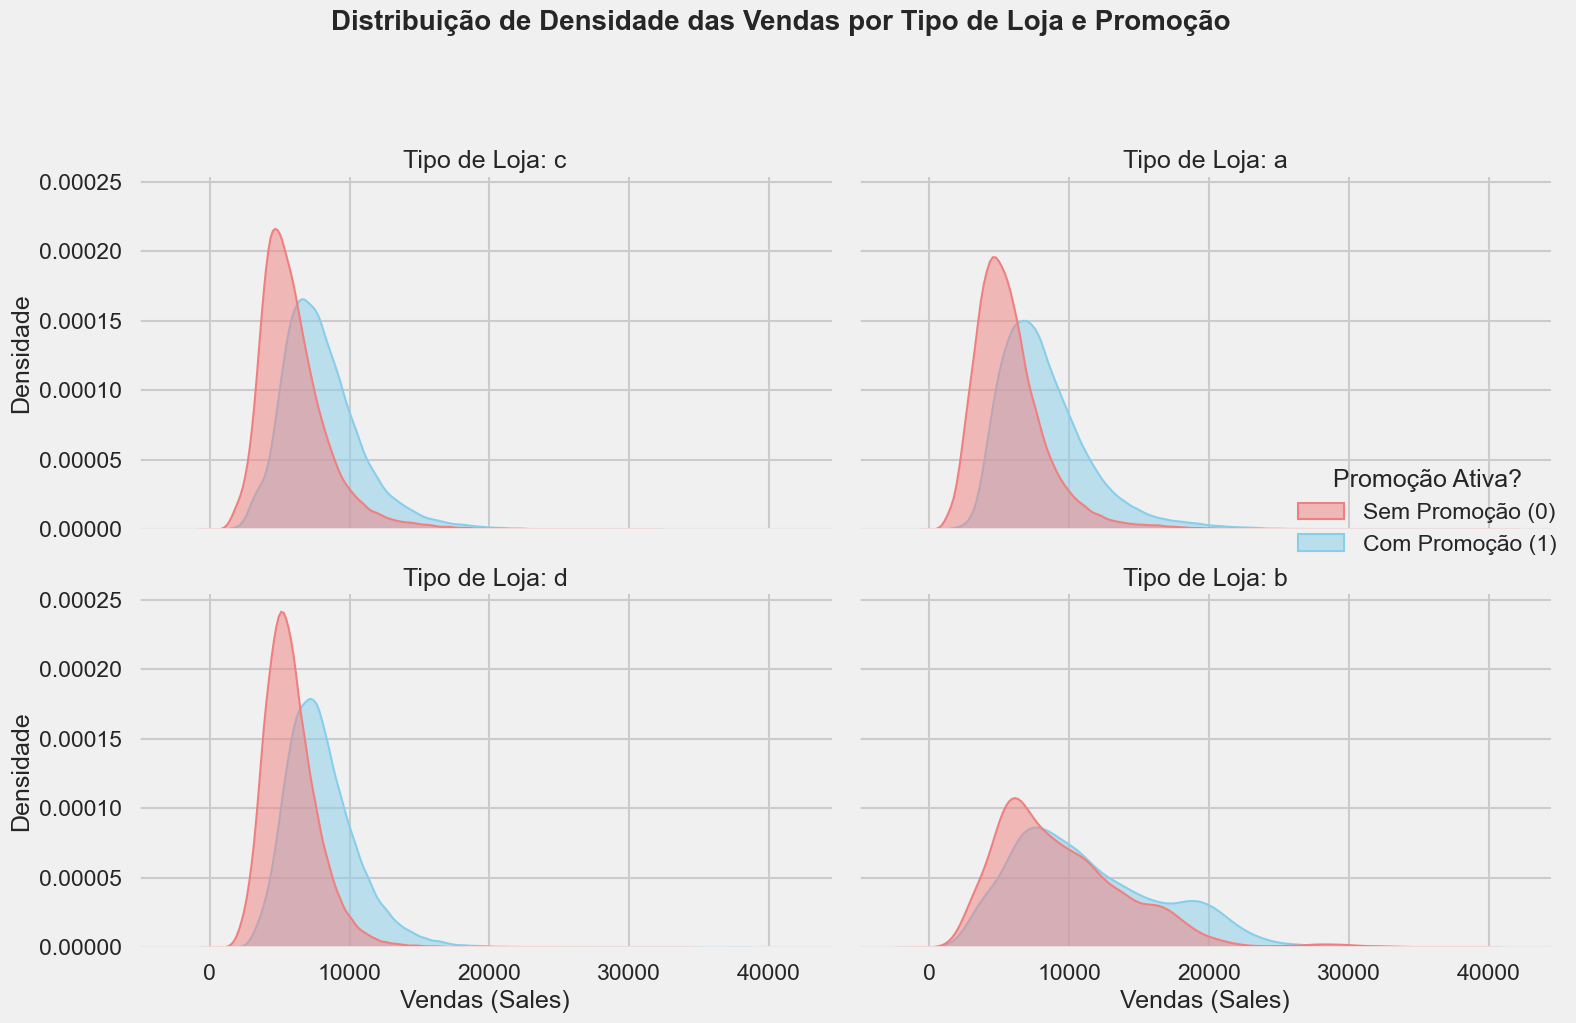

In [60]:
plt.style.use('fivethirtyeight')
sns.set_context('talk')

# Criar o gráfico de densidade facetado
g = sns.displot(
    data=df_completo,
    x='Sales',
    hue='Promo',  # Diferencia por promoção (0 ou 1)
    col='StoreType',  # Cria uma coluna de subplots para cada tipo de loja
    kind='kde',  # Especifica que queremos um gráfico de densidade
    col_wrap=2,  # Define quantas colunas de subplots teremos (ajuste conforme necessário)
    fill=True,  # Preenche a área sob a curva de densidade
    alpha=0.5,  # Define a transparência do preenchimento
    height=5,  # Define a altura de cada faceta
    aspect=1.5,  # Define a proporção da largura para a altura de cada faceta
    palette=['lightcoral', 'skyblue'], # Cores para Sem Promoção e Com Promoção
    common_norm=False # Normaliza cada densidade individualmente
)

# Ajustar títulos e rótulos
g.set_axis_labels('Vendas (Sales)', 'Densidade')
g.set_titles("Tipo de Loja: {col_name}") # Título para cada subplot
g.fig.suptitle('Distribuição de Densidade das Vendas por Tipo de Loja e Promoção',
               fontsize=20, fontweight='bold', y=1.03) # Título geral

# Melhorar a legenda
try:
    # Para versões mais recentes do Seaborn, a legenda pode ser acessada de outra forma
    if hasattr(g, '_legend'):
        g._legend.set_title('Promoção Ativa?')
        new_labels = ['Sem Promoção (0)', 'Com Promoção (1)']
        for t, l in zip(g._legend.texts, new_labels):
            t.set_text(l)
    # Para versões mais antigas, pode ser necessário um workaround ou ajuste manual
except Exception as e:
    print(f"Ajuste manual da legenda pode ser necessário: {e}")


# Pode ser útil limitar o eixo X se houver outliers extremos que achatam a visualização
# Para cada eixo no displot:
# for ax in g.axes.flat:
# ax.set_xlim(0, df_completo['Sales'].quantile(0.99)) # Exemplo: limita ao percentil 99

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajusta para o suptitle
plt.show()

# Algorítmos auxiliares

In [61]:
from PIL import Image

def remover_fundo_branco(caminho_imagem_entrada, caminho_imagem_saida, tolerancia=10):
    """

    Args:
        caminho_imagem_entrada (str): O caminho para a imagem de entrada.
        caminho_imagem_saida (str): O caminho para salvar a imagem com fundo removido.
        tolerancia (int): Valor de 0 a 255 para definir quão próximo do branco puro
                          um pixel precisa estar para ser considerado branco.
                          Aumentar se brancos levemente acinzentados não estiverem sendo removidos.
    """
    try:
        # Abrir a imagem
        img = Image.open('/content/barras_portipo.png')

        # Converter a imagem para RGBA (para suportar transparência)
        img = img.convert("RGBA")

        # Obter os dados da imagem
        datas = img.getdata()

        nova_imagem_data = []
        for item in datas:
            # item[0] é R (vermelho), item[1] é G (verde), item[2] é B (azul)
            # Se o pixel for branco (ou muito próximo do branco, dentro da tolerância)
            if item[0] >= (255 - tolerancia) and \
               item[1] >= (255 - tolerancia) and \
               item[2] >= (255 - tolerancia):
                # Definir como transparente (R, G, B, Alpha)
                nova_imagem_data.append((255, 255, 255, 0))
            else:
                nova_imagem_data.append(item)

        # Atualizar os dados da imagem
        img.putdata(nova_imagem_data)

        # Salvar a imagem resultante (PNG suporta transparência)
        img.save(caminho_imagem_saida, "PNG")
        print(f"Fundo branco removido e imagem salva em: {caminho_imagem_saida}")

    except FileNotFoundError:
        print(f"Erro: Imagem de entrada não encontrada em '{caminho_imagem_entrada}'")
    except Exception as e:
        print(f"Ocorreu um erro: {e}")

if __name__ == "__main__":
    imagem_original = "imagem_com_fundo_branco.png"
    imagem_sem_fundo = "imagem_sem_fundo_branco.png"

    # Chama a função para remover o fundo
    # Ajuste a tolerância se necessário. Um valor maior removerá mais tons próximos ao branco.
    remover_fundo_branco(imagem_original, imagem_sem_fundo, tolerancia=20)

Erro: Imagem de entrada não encontrada em 'imagem_com_fundo_branco.png'
